# --------- PROYECTO INTEGRADOR M4 ---------

# AVANCE 1

In [1]:
#Carga de Librerias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
data = pd.read_csv("data_latinoamerica.csv", sep=',')

In [3]:
#Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.
data_limpia_1= data[data['location_key'].isin(['AR','BR','CL','CO','MX','PE'])]

In [4]:
#Filtra los datos en fechas mayores a 2021-01-01.
data_limpia=data_limpia_1[data_limpia_1['date']>'2021-01-01']

In [56]:
data_limpia.to_csv("DatosFinalesFiltrados.csv", index=True)

In [3]:
#Se carga nuevamente la base para correr mejor el archivo
data_limpia = pd.read_csv("DatosFinalesFiltrados.csv", sep=',')

In [12]:
#valores nulos 
valores_nulos=data_limpia.isnull().sum()[data_limpia.isnull().sum()>0]
print(valores_nulos)
print(np.shape(data_limpia))

Series([], dtype: int64)
(3744, 50)


In [8]:
#Estadisticas de cada columna
for i in data_limpia.columns:
    print(i)
    #Esto imprime las estadísticas descriptivas (como count, mean, std, min, 25%, 50%, 75%, max) para esa columna.
    print(data_limpia[i].describe())
    print('--------------------------------------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
--------------------------------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------------------------------------------
new_confirmed
count      3723.000000
mean      13936.279613
std       24273.618006
min        -573.000000
25%        1530.500000
50%        5176.000000
75%       14915.000000
max      298408.000000
Name: new_confirmed, dtype: float64
----------------------------------------------------------

In [9]:
#Se crea la funcion para obtenes las estadisticas: mediana,varianza y rango
def medidas(data_limpia):
    for i in data_limpia.columns:
        #Comprueba si el tipo de datos de la columna es flotante o entero
        if data[i].dtype== 'float64' or data_limpia[i].dtype=='int64':
            print(i)
            print("Mediana:", data_limpia[i].median())
            print("Varianza:", data_limpia[i].var())
            #Calcula e imprime el rango restando el valor maximo con el minimo
            print("Rango:", data_limpia[i].max() - data_limpia[i].min())
            print("------------------------------------")
            
medidas(data_limpia)            

new_confirmed
Mediana: 5176.0
Varianza: 589208531.1036869
Rango: 298981.0
------------------------------------
new_deceased
Mediana: 99.0
Varianza: 258520.75677747422
Rango: 11447.0
------------------------------------
cumulative_confirmed
Mediana: 3633546.0
Varianza: 63994005722816.09
Rango: 34567862.0
------------------------------------
cumulative_deceased
Mediana: 139636.0
Varianza: 33497168416.87168
Rango: 685202.0
------------------------------------
cumulative_vaccine_doses_administered
Mediana: 42290688.0
Varianza: 9194820564416346.0
Rango: 347868463.0
------------------------------------
population
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango: 194985406.0
------------------------------------
population_male
Mediana: 22254165.0
Varianza: 1101239940970119.2
Rango: 95463769.0
------------------------------------
population_female
Mediana: 23245825.0
Varianza: 1189151109519313.2
Rango: 99521637.0
------------------------------------
population_rural
Mediana: 8316127.5
Va

In [11]:
# Lista de columnas numéricas donde queremos rellenar los NaN con la media por país
columnas_a_rellenar = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'rainfall_mm', 'relative_humidity', 'average_temperature_celsius', 
    'minimum_temperature_celsius', 'maximum_temperature_celsius']

# Bucle para cada país y para calcular la media 
for pais in data_limpia['location_key'].unique():
    # Bucle para cada columna que necesita relleno
    for columna in columnas_a_rellenar:
        #loc para filtrar la columna
        media_columna = data_limpia.loc[data_limpia["location_key"] == pais, columna].mean()             
        data_limpia.loc[data_limpia["location_key"] == pais, columna] = \
            data_limpia.loc[data_limpia["location_key"] == pais, columna].fillna(media_columna)

# Rellenar con 0 valores específicos para estas columnas
columnas_con_cero = ['new_recovered', 'cumulative_recovered', 'cumulative_vaccine_doses_administered']
for columna in columnas_con_cero:
    data_limpia[columna] = data_limpia[columna].fillna(0)

# Verificar si quedan valores nulos
print(data_limpia.isnull().sum()[data_limpia.isnull().sum() > 0])


Series([], dtype: int64)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\934479413.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia[columna] = data_limpia[columna].fillna(0)


# ------------AVANCE 2 PROYECTO INTEGRADOR ------------

In [13]:
#Aqui se utiliza la columna date como index
data_limpia['date']= pd.to_datetime(data_limpia['date'])
#Asegura que la operación se realice sobre el mismo DataFrame sin necesidad de reasignar el resultado a una nueva variable.
data_limpia.set_index('date', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1344520085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['date']= pd.to_datetime(data_limpia['date'])


In [15]:
#Se crea la matriz de la correlacion de las variables numericas 
#selecciona las columnas que tienen tipos de datos numericos
columnas_numericas = data_limpia.select_dtypes(include=['float64','int64']).columns 
#indica que tan correlacionadas las variables
correlacion_matrix = data_limpia[columnas_numericas].corr()

In [16]:
#Se crea una mascara para el triangulo superior
#np.triu() crea una matriz booleana triangular superior, con True en las posiciones que corresponden a la mitad superior de la matriz y False en las posiciones de la mitad inferior. 
# Esto se utiliza para ocultar la mitad superior de la matriz de correlación, que es simétrica, lo que hace que el gráfico sea más fácil de leer.
mascara = np.triu(np.ones_like(correlacion_matrix, dtype=bool))
mascara

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [17]:
#Se muestran los valores mayor a 0.5, donde hay una correlacion fuerte. (NaN) indicando que los valores son menores que 0.5

correlacion_matrix = correlacion_matrix[abs(correlacion_matrix) > abs(0.5)]
correlacion_matrix

new_confirmed  new_deceased  \
new_confirmed                               1.000000      0.523936   
new_deceased                                0.523936      1.000000   
cumulative_confirmed                             NaN           NaN   
cumulative_deceased                              NaN           NaN   
cumulative_vaccine_doses_administered            NaN           NaN   
population                                  0.501047           NaN   
population_male                                  NaN           NaN   
population_female                                NaN           NaN   
population_rural                                 NaN           NaN   
population_urban                                 NaN           NaN   
population_density                               NaN           NaN   
human_development_index                          NaN           NaN   
population_age_00_09                             NaN           NaN   
population_age_10_19                             NaN           NaN   
population_age_20_29                             NaN           NaN   
population_age_30_39                        0.504927           NaN   
population_age_40_49                        0.513309           NaN   
population_age_50_59                        0.526696           NaN   
population_age_60_69                        0.534516           NaN   
population_age_70_79                        0.534378           NaN   
population_age_80_and_older                 0.537137           NaN   
gdp_usd                                          NaN           NaN   
gdp_per_capita_usd                               NaN           NaN   
latitude                                         NaN           NaN   
longitude                                        NaN           NaN   
area_sq_km                                  0.547271           NaN   
smoking_prevalence                               NaN           NaN   
diabetes_prevalence                              NaN           NaN   
infant_mortality_rate                            NaN           NaN   
nurses_per_1000                                  NaN           NaN   
physicians_per_1000                              NaN           NaN   
average_temperature_celsius                      NaN           NaN   
minimum_temperature_celsius                      NaN           NaN   
maximum_temperature_celsius                      NaN           NaN   
rainfall_mm                                      NaN           NaN   
relative_humidity                                NaN           NaN   
population_largest_city                          NaN           NaN   
area_rural_sq_km                            0.547230           NaN   
area_urban_sq_km                                 NaN           NaN   
life_expectancy                                  NaN           NaN   
adult_male_mortality_rate                        NaN           NaN   
adult_female_mortality_rate                      NaN           NaN   
pollution_mortality_rate                         NaN           NaN   
comorbidity_mortality_rate                       NaN           NaN   
new_recovered                               0.646117      0.537354   
cumulative_recovered                             NaN           NaN   

                                       cumulative_confirmed  \
new_confirmed                                           NaN   
new_deceased                                            NaN   
cumulative_confirmed                               1.000000   
cumulative_deceased                                0.904984   
cumulative_vaccine_doses_administered              0.862858   
population                                         0.787784   
population_male                                    0.782337   
population_female                                  0.779412   
population_rural                                   0.555727   
population_urban                                   0.770486   
population_density                                     

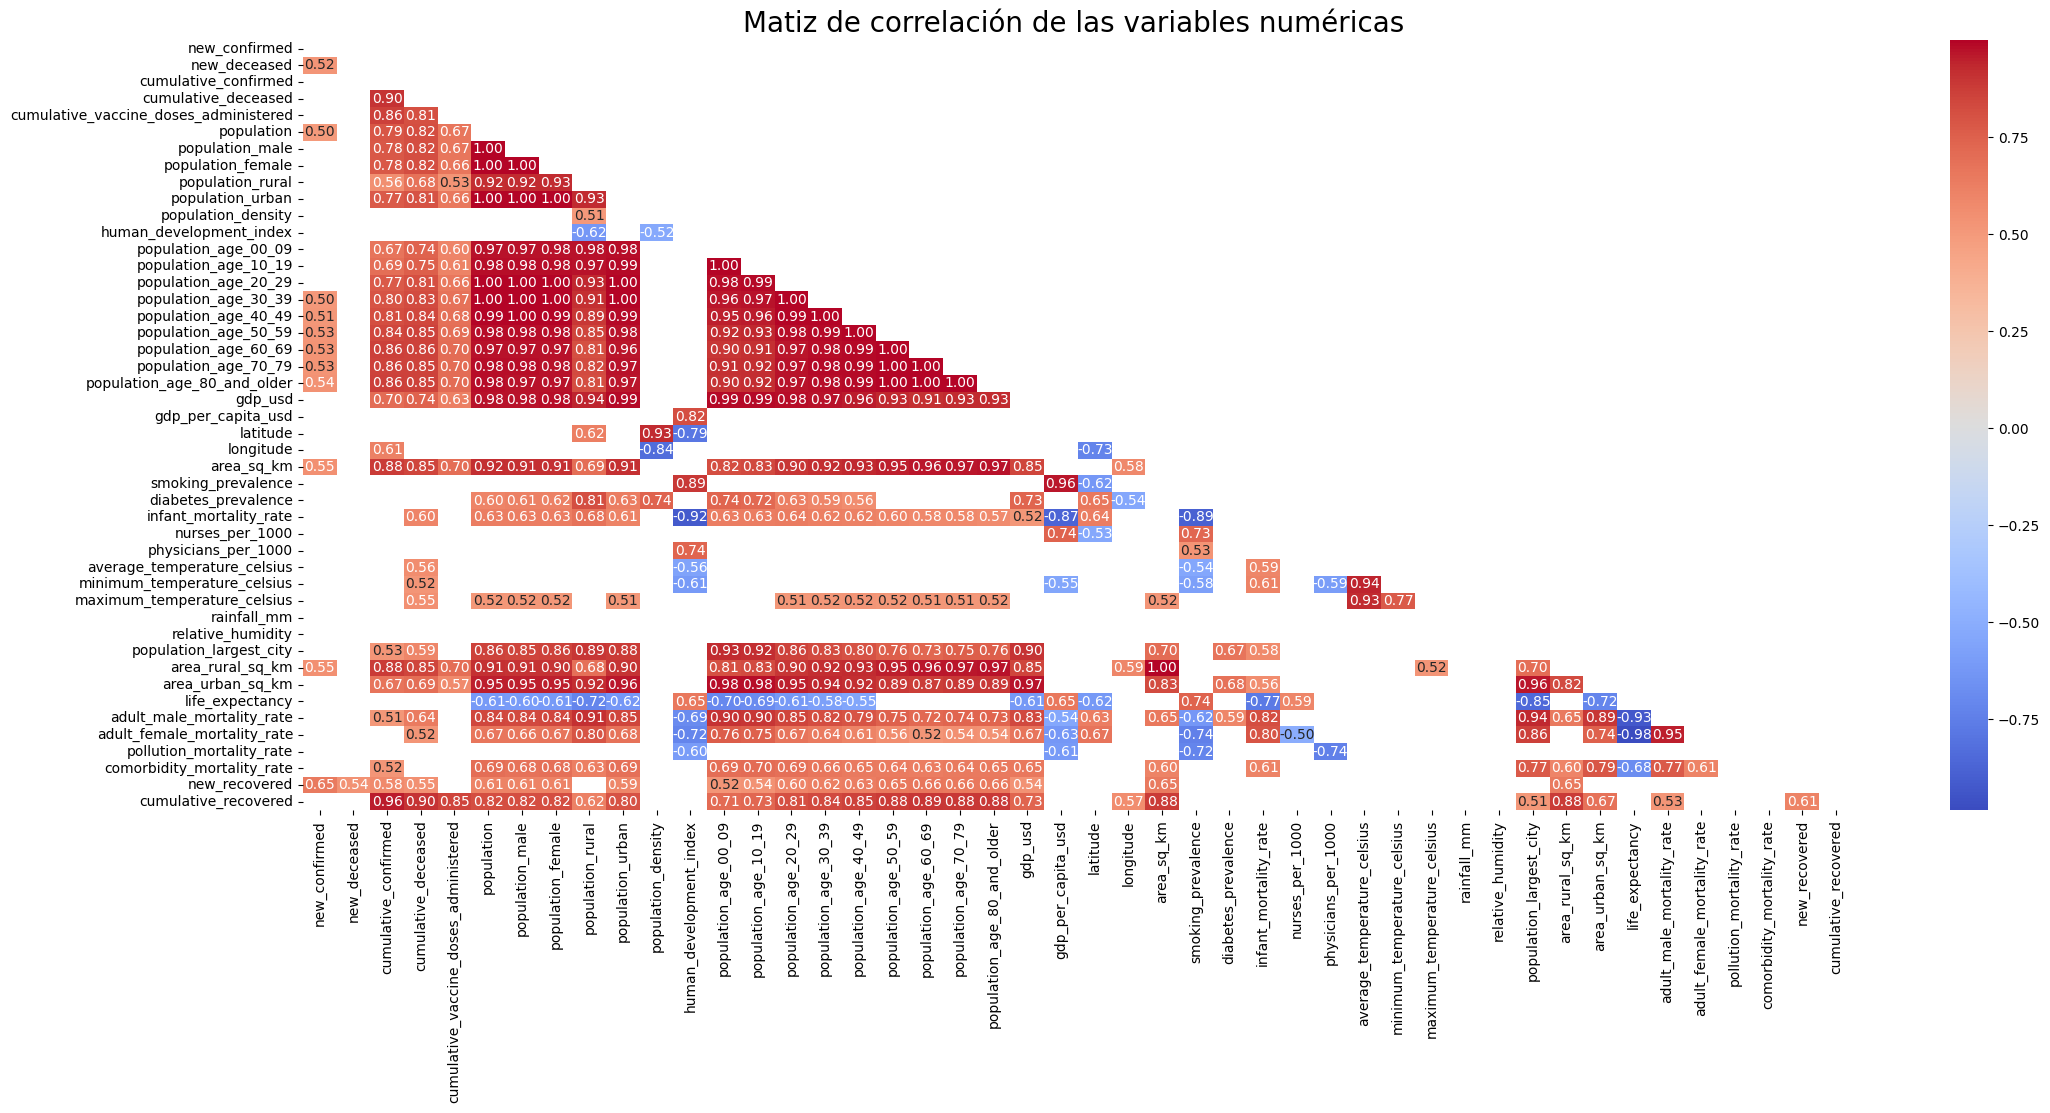

In [18]:
#Se crea la grafica de calor para identificar donde estan las variables de mayor correlacion.
#figsize para darle el tamaño
plt.figure(figsize=(25,10))
#heatmap para crear el grafico, annot muestra los valores numericos y cmap la paleta de color y fmt los decimales
heatmap = sns.heatmap(correlacion_matrix, mask=mascara, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matiz de correlación de las variables numéricas ', fontsize=20)
plt.show()


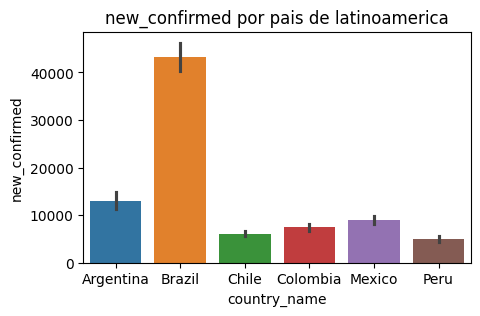

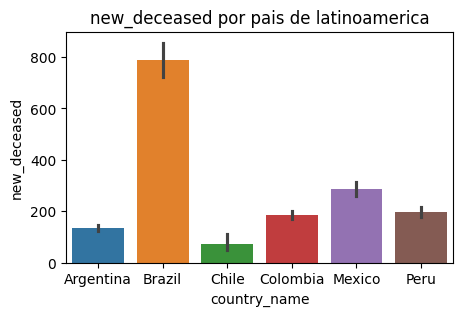

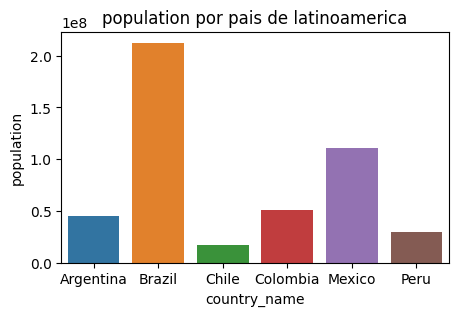

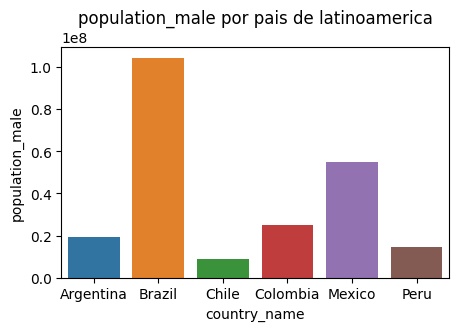

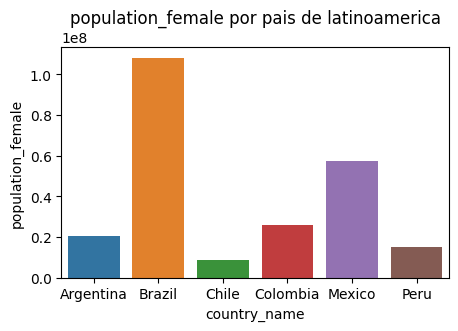

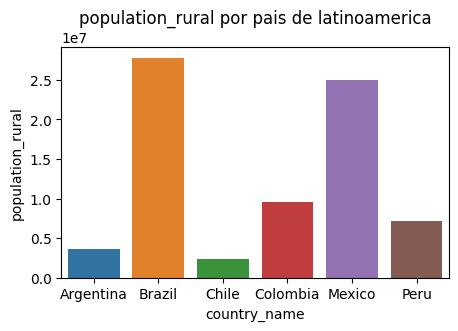

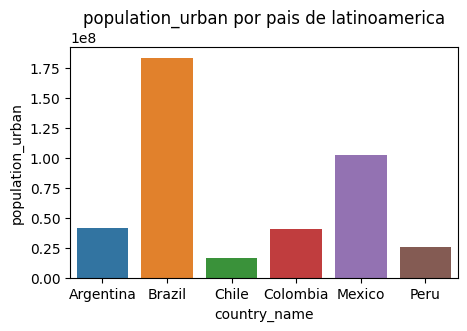

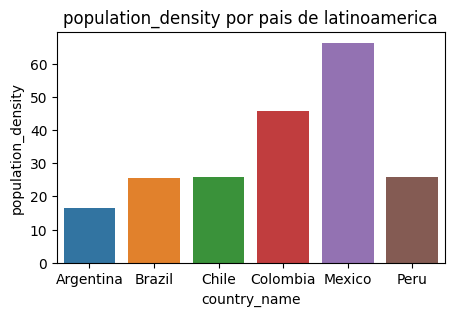

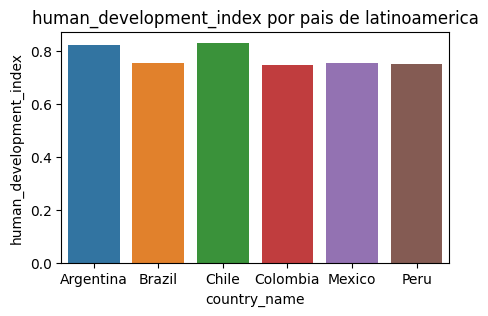

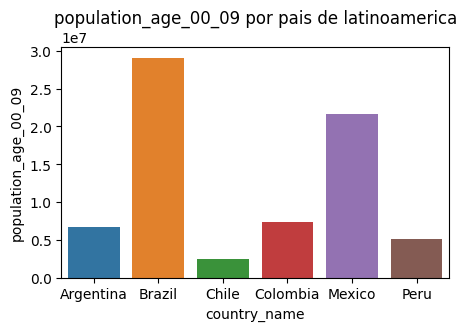

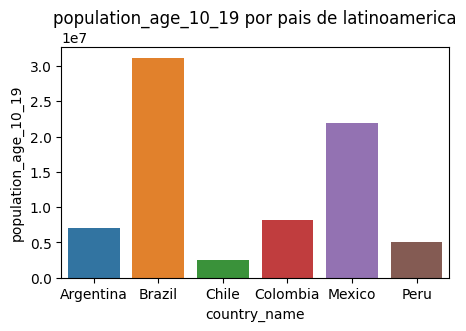

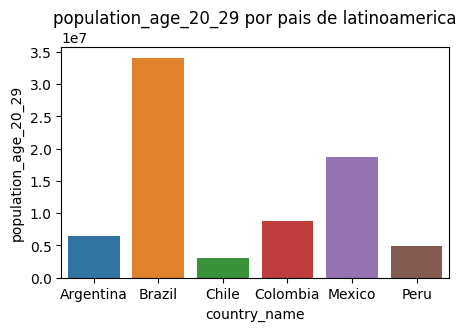

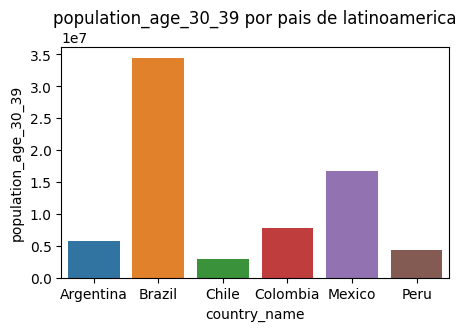

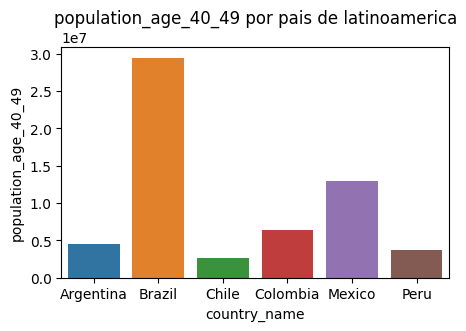

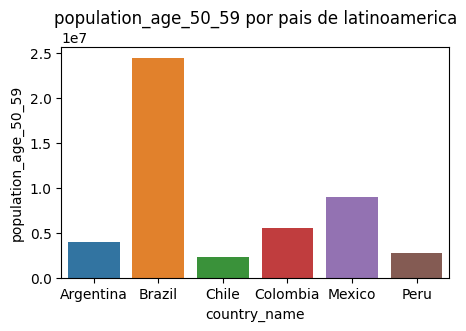

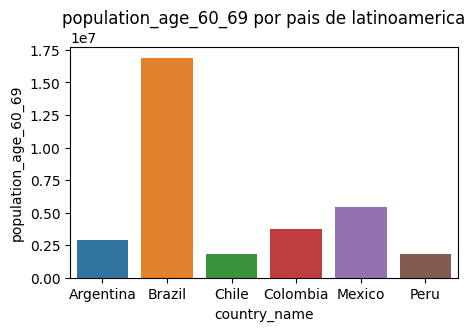

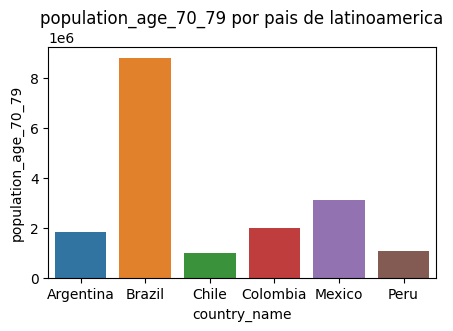

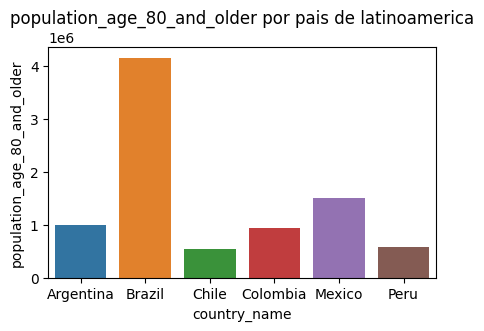

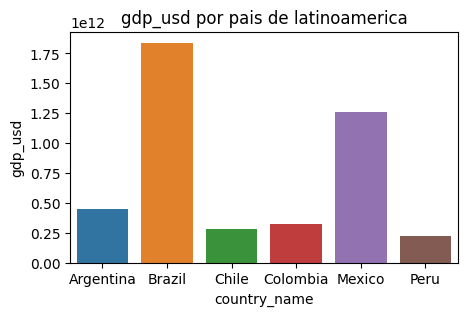

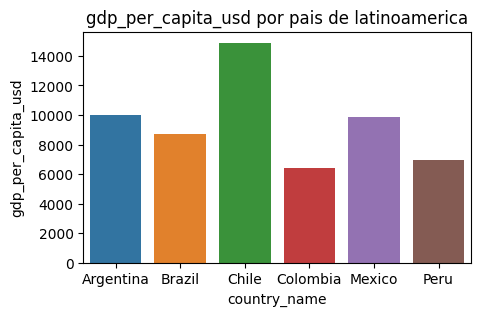

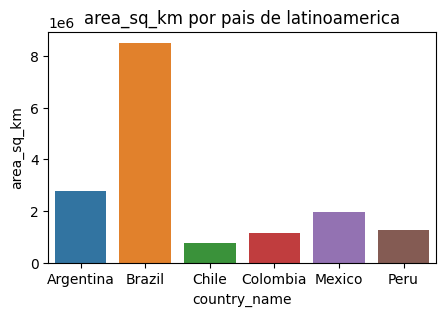

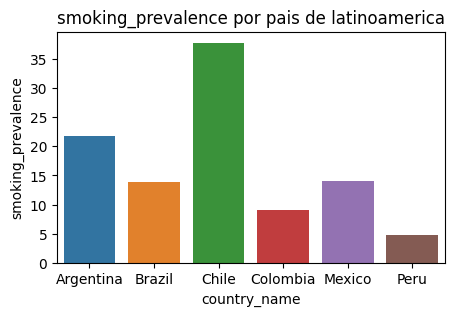

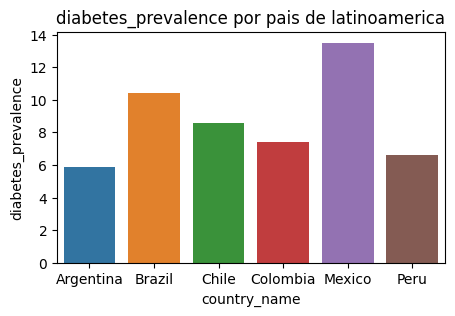

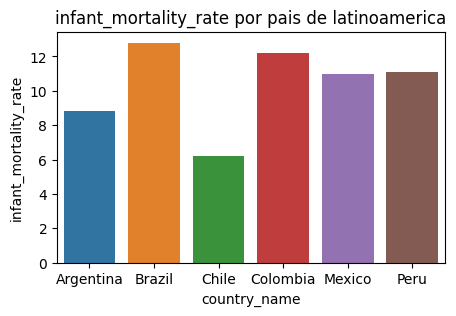

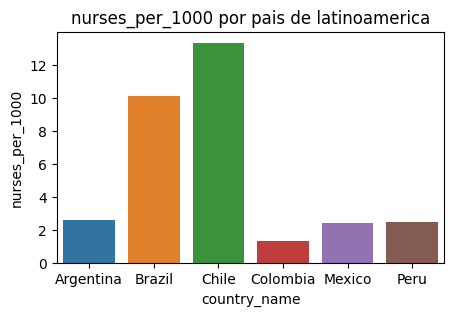

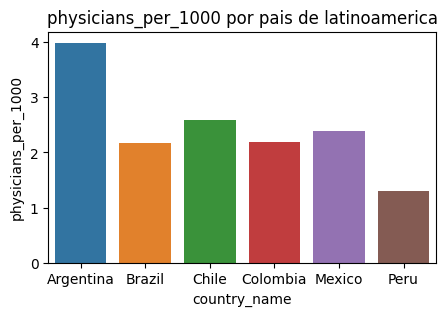

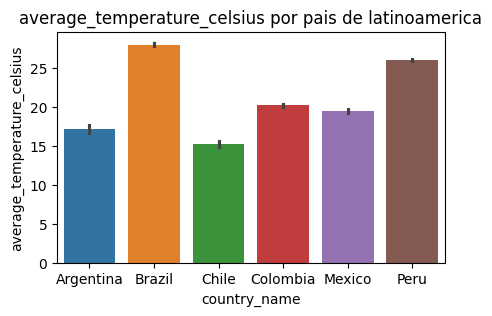

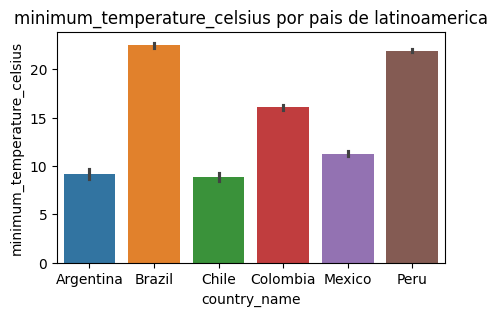

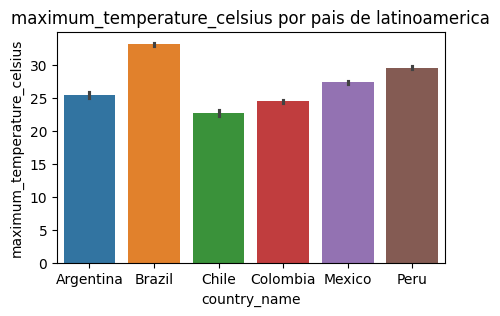

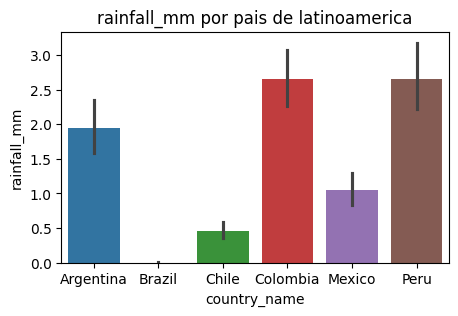

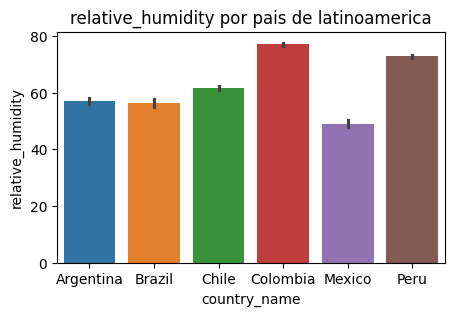

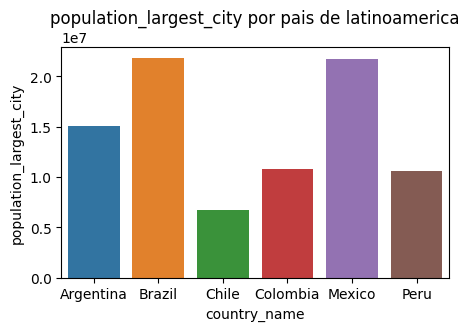

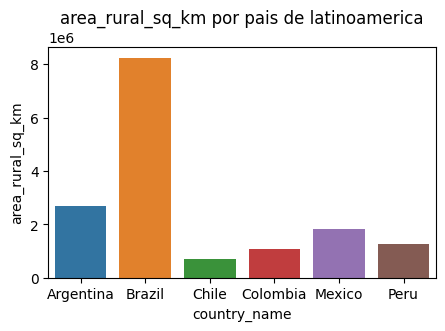

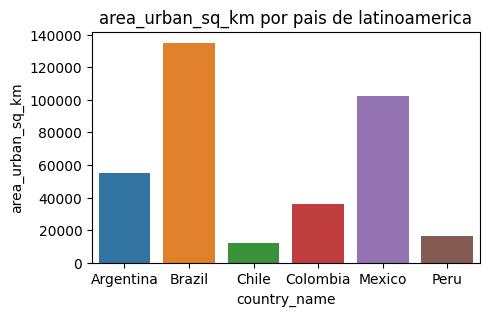

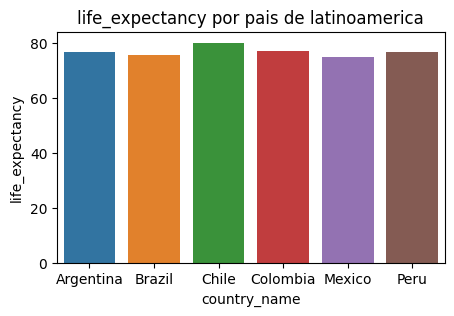

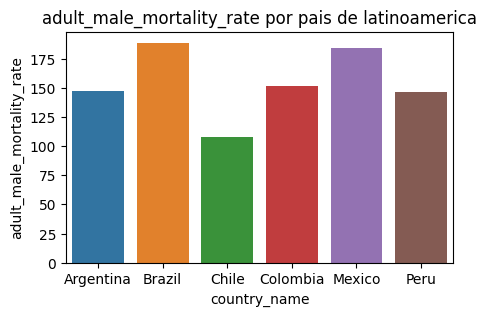

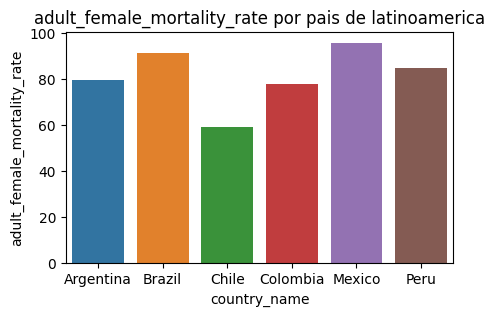

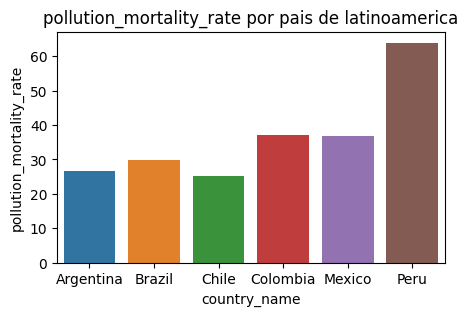

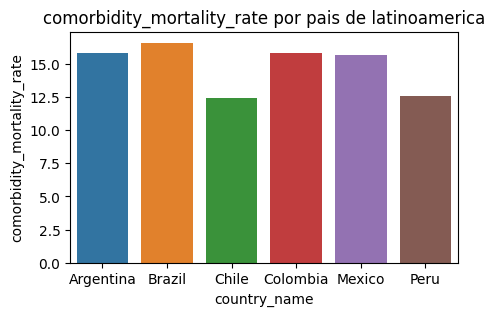

In [20]:
# Se crea Gráficos de barras de países iterando por columnas para comparar estas variables

for i in data_limpia.columns:
    if i not in['location_key', 'date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
        #Configurar el tamaño del grafico
        fig, ax = plt.subplots(figsize=(5,3))
        #sns para realizar el grafico de barras
        sns.barplot(x='country_name', y= i, data=data_limpia, ax=ax, hue='country_name')
        plt.title(f'{i} por pais de latinoamerica')
        plt.show()



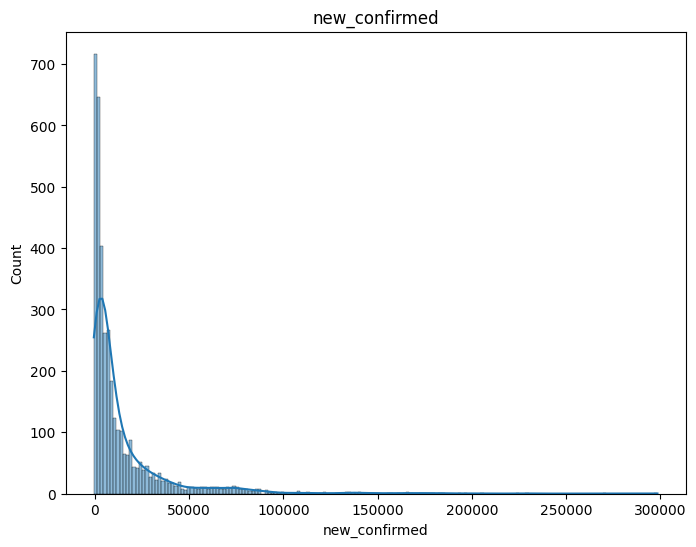

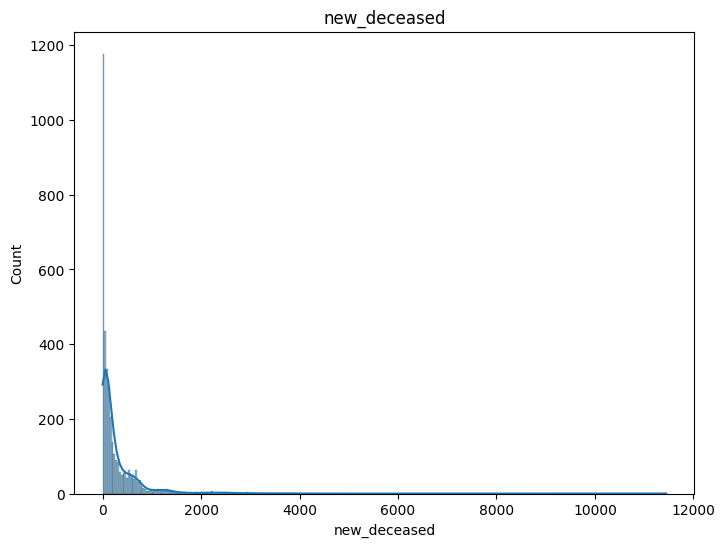

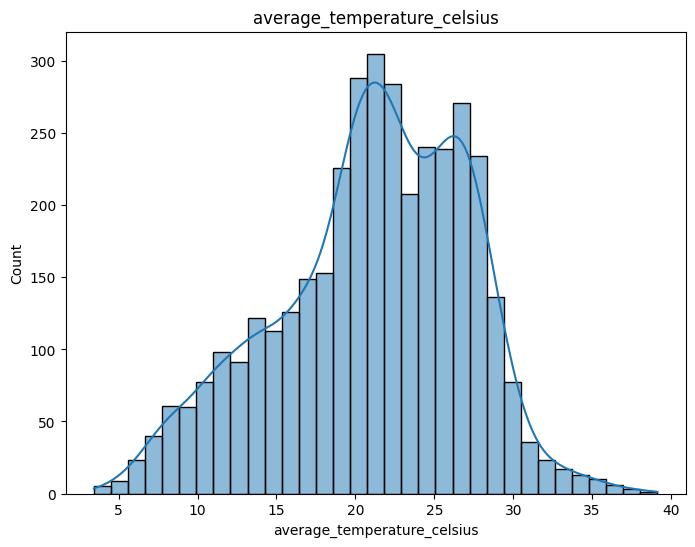

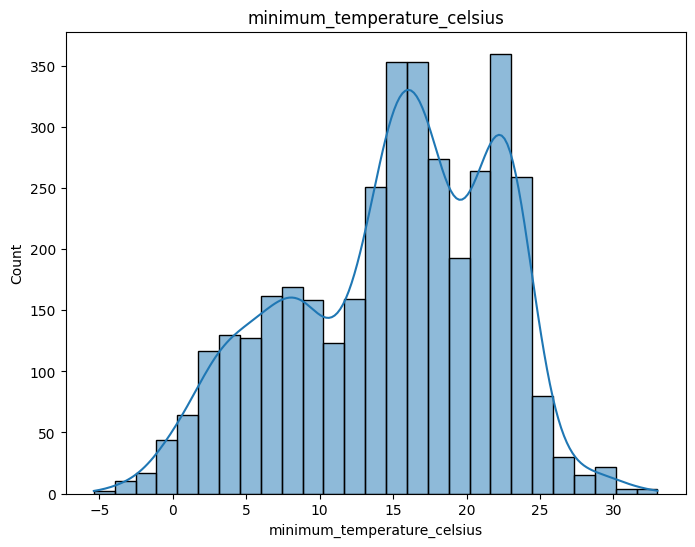

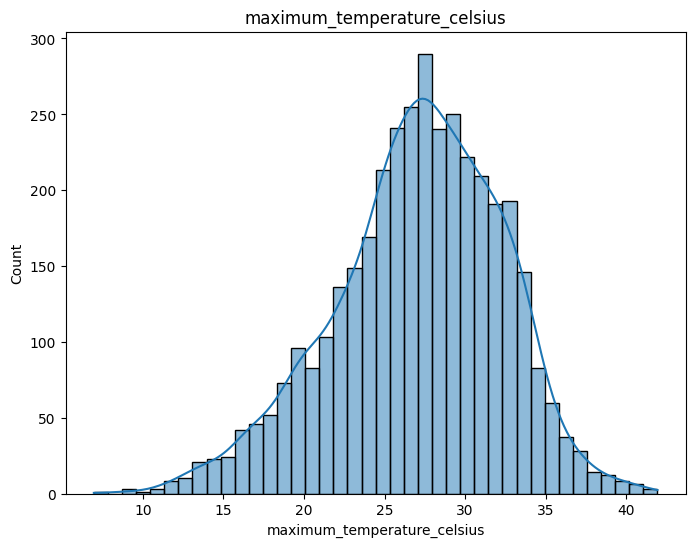

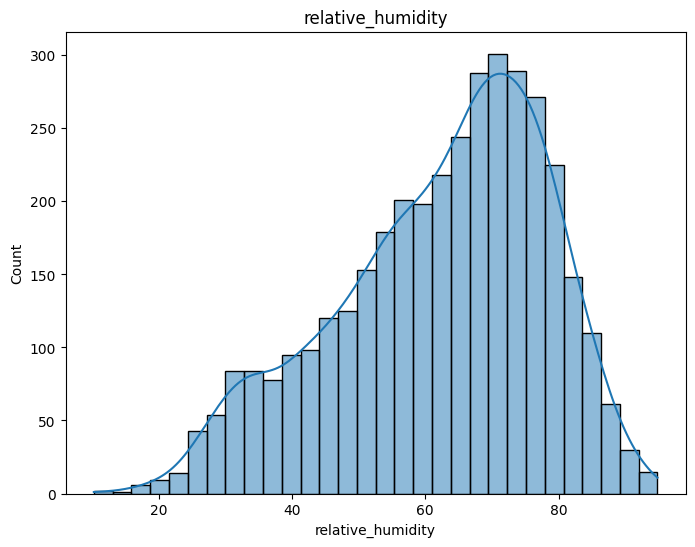

In [22]:
#Creamos la lista de columnas necesarias para la creacion de los graficos
listas_columnas = ['new_confirmed', 'new_deceased','cumulative_confirmed','cumulative_deceased', 'cumulative_vaccine_doses_administered','average_temperature_celsius',
                    'minimum_temperature_celsius', 'maximum_temperature_celsius','relative_humidity']
# Crear un histograma de las variables numericas y buscar valores atipicos
for i in data_limpia[listas_columnas]:
    #seleccionamos la columna que no queremos recorrer
    if i not in ['location_key','date','country_code', 'country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8,6))
        #Crea un histograma con una línea de densidad sobreimpuesta (KDE).
        sns.histplot(data_limpia[i], kde=True)
        plt.title(i)
        plt.show()


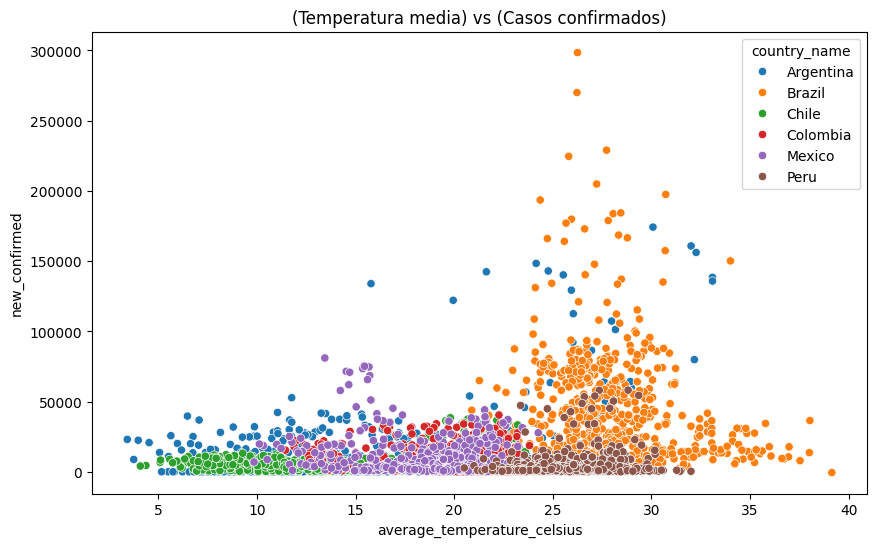

In [24]:
#Diagrama de dispersión de la temperatura media contra los casos confirmados con scatterplot
#average_temperature_celsius vs new confirmed

fig, ax = plt.subplots(figsize=(10,6))
#Crear diagrama de dispersion discriminando por pais
sns.scatterplot(x="average_temperature_celsius", y="new_confirmed", data=data_limpia, hue="country_name")
plt.title("(Temperatura media) vs (Casos confirmados)")
plt.show()

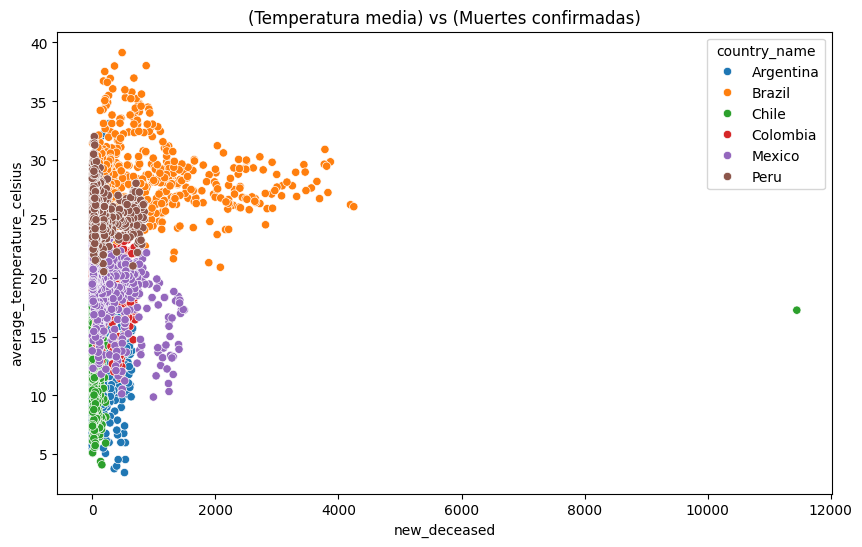

In [25]:
#Diagrama de dispersión de la temperatura media contra las muertes confirmadas.
#average_temperature_celsius vs new deceased

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="new_deceased", y="average_temperature_celsius", data=data_limpia, hue="country_name")
plt.title("(Temperatura media) vs (Muertes confirmadas)")
plt.show()

#habiendo en chile un dato atipico, elevando las muertes confirmadas a una temperatura baja por cuestiones de suministros en hospitales.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1829272720.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia.resample('M').mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()


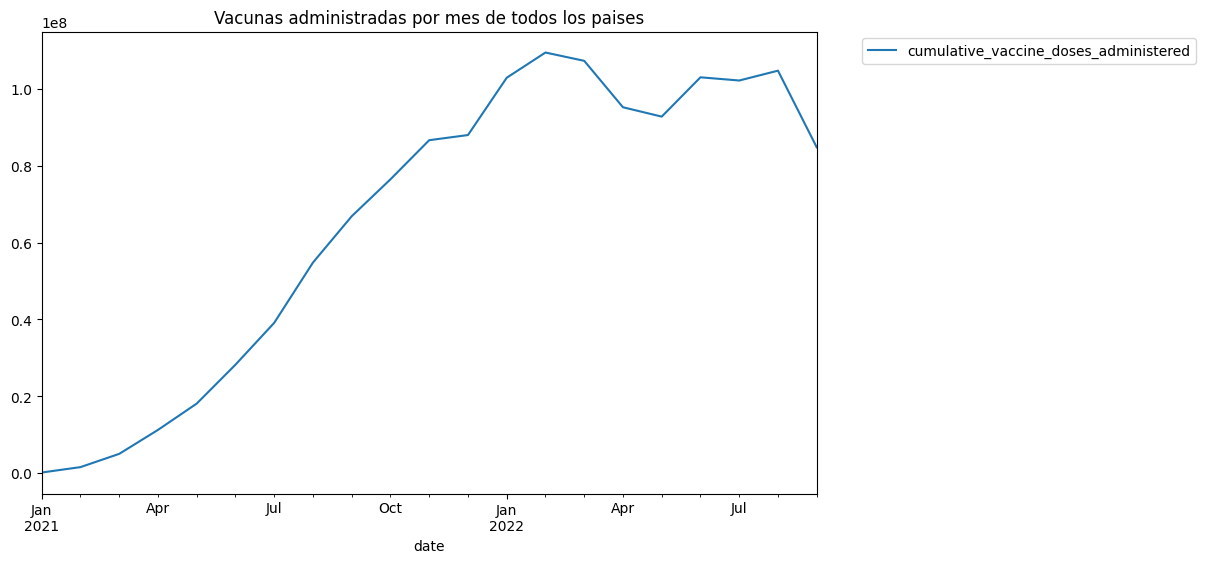

In [26]:
#Comportamiento de las dosis administradas de todos los países (Valor medio).
#cumulative_vaccine_doses_administered
#Los subplots se organizan en una cuadrícula, especificando el número de filas y columnas.
fig, ax = plt.subplots(figsize=(10,6))
#Agrupa los datos por mes con resampleo, numeric filtra columnas numericas
data_limpia.resample('M').mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
#ubicacion de la leyenda 
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.title("Vacunas administradas por mes de todos los paises")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2908048433.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2908048433.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2908048433.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel

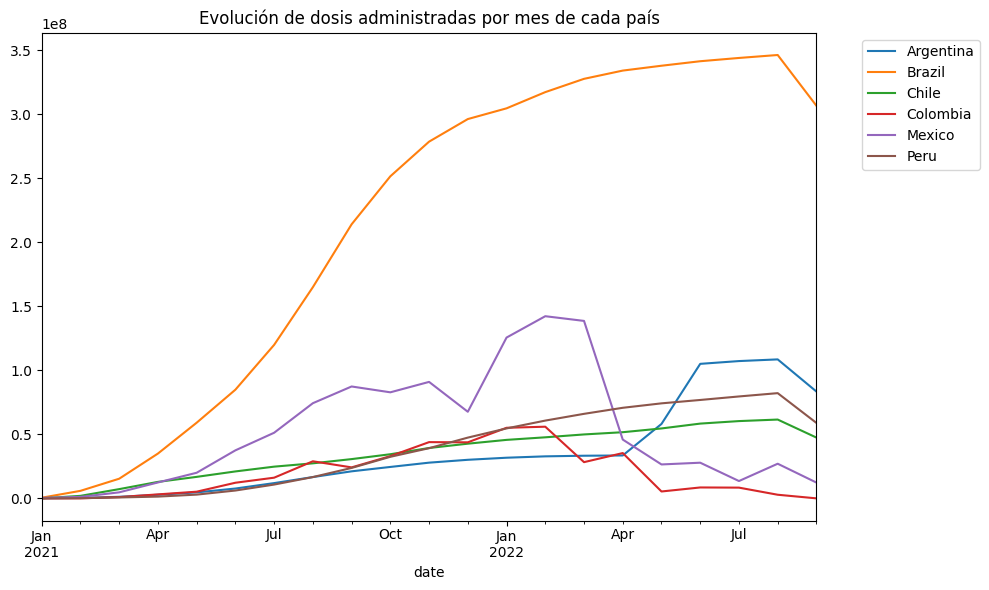

In [27]:
#Evolución de dosis administradas por mes de cada país. 
#cumulative_vaccine_doses_administered
paises_seleccionados = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada país y graficar. nuevamente resampleando por mes y valores numericos 
for pais in paises_seleccionados:
    data_limpia[data_limpia['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(ax=ax, label=pais)

plt.title("Evolución de dosis administradas por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Para ajustar el layout y evitar que se corte la leyenda
plt.show()

#Asi comprobamos que Brasil y Mexico son los que mas han administado dosis

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1112633753.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_deceased'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1112633753.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_deceased'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1112633753.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_deceased'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1112633753.py:9: FutureWarning: 'M' is deprecate

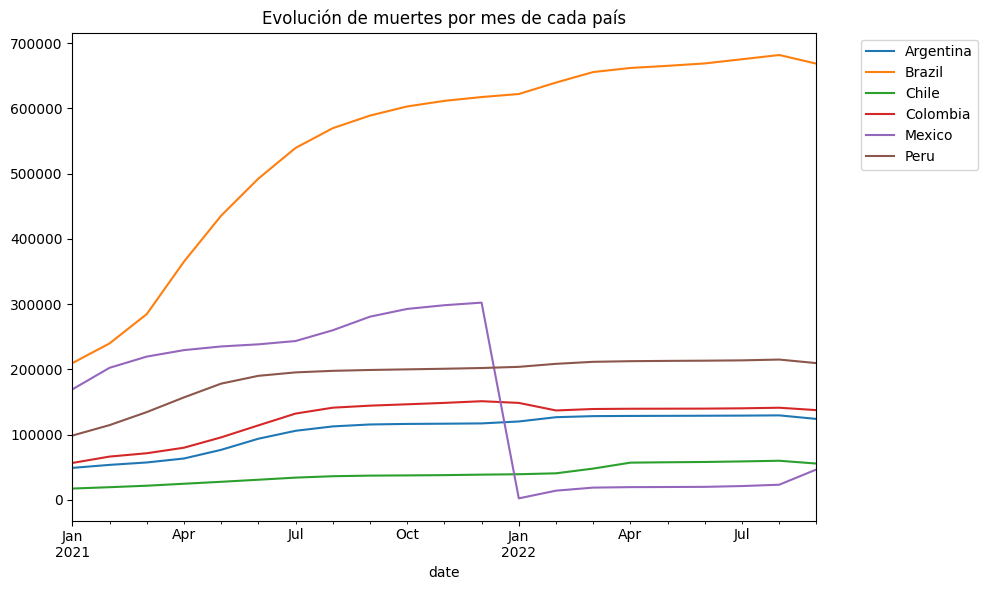

In [28]:
#Evolucion de muertes por mes de cada país.
#cumulative_deceased

paises_seleccionados = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada país y graficar
for pais in paises_seleccionados:
    data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_deceased'].plot(ax=ax, label=pais)

plt.title("Evolución de muertes por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Para ajustar el layout y evitar que se corte la leyenda
plt.show()  # Mostrar el gráfico solo una vez
#posiblemente haya errores en los datos demostrando la caida de linea en el grafico de mx

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2227694710.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2227694710.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2227694710.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2227694710.py:10: FutureWarning: 'M' is de

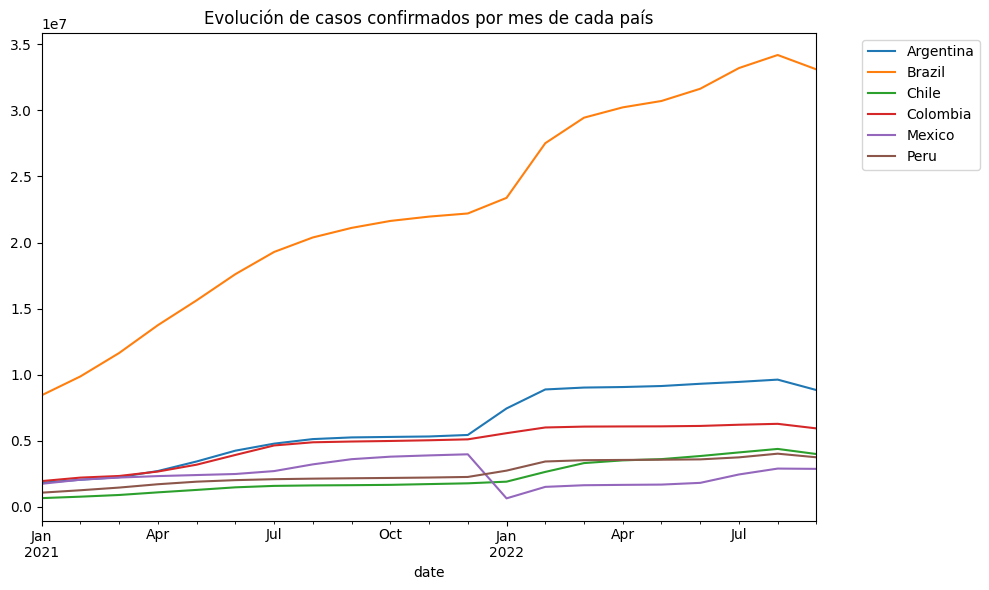

In [29]:
#Evolucion de casos por mes de cada pais
#cumulative_confirmed

paises_seleccionados = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada país y graficar
for pais in paises_seleccionados:
    # Filtrar los datos y resamplear
    data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot(ax=ax, label=pais)

# Configurar el título y la leyenda
plt.title("Evolución de casos confirmados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Para ajustar el layout y evitar que se corte la leyenda
plt.show()  # Mostrar el gráfico solo una vez


C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2615663922.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_recovered'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2615663922.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_recovered'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2615663922.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_recovered'].plot(ax=ax, label=pais)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2615663922.py:9: FutureWarning: 'M' is deprec

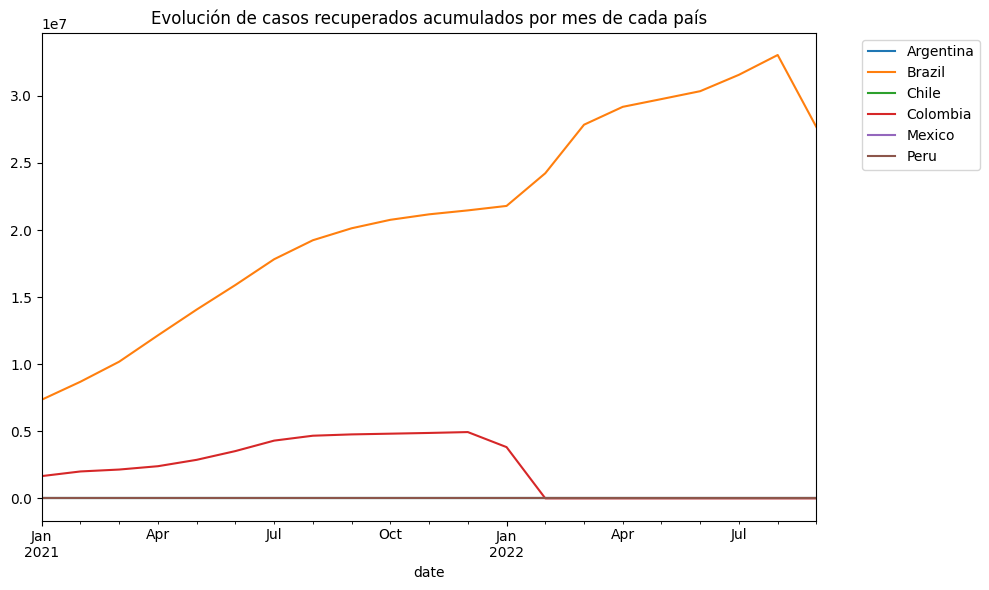

In [30]:
#Evolucion de Casos recuperados por mes de cada pais
#cumulative_recovered

paises_seleccionados = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada país y graficar
for pais in paises_seleccionados:
    data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_recovered'].plot(ax=ax, label=pais)
    
plt.title("Evolución de casos recuperados acumulados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Para ajustar el layout y evitar que se corte la leyenda
plt.show() 

#Se puede enter que hay errores en la base, se dejaron de llenar registros o la base esta corrupta ademas de los valores en los paises faltantes

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1553534721.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subset = data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['new_confirmed']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1553534721.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subset = data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['new_confirmed']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1553534721.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subset = data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['new_confirmed']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1553534721.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inst

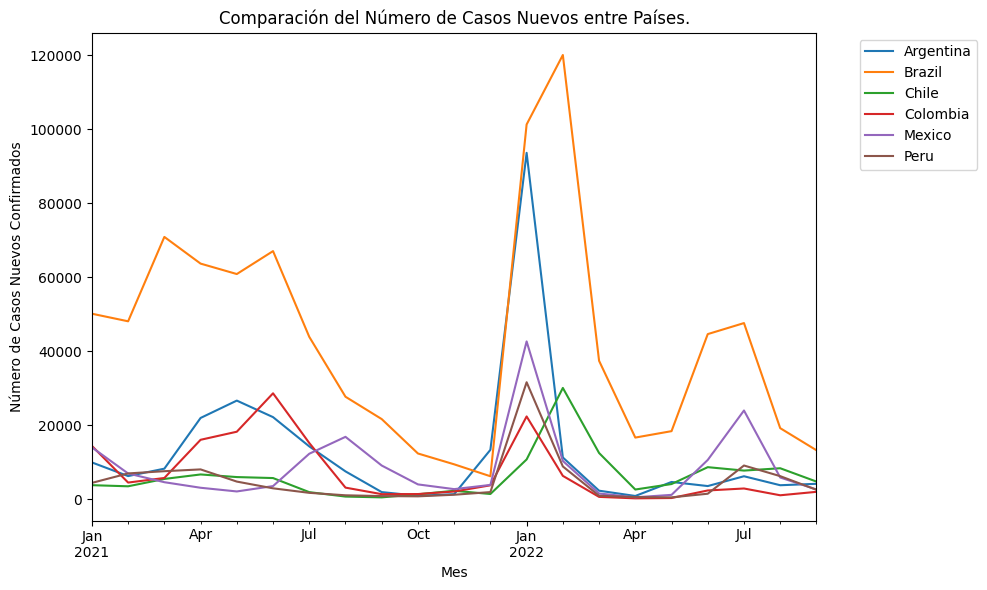

In [31]:
#Comparación del Número de Casos Nuevos entre Países.

paises_seleccionados = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada país y graficar
for pais in paises_seleccionados:
    subset = data_limpia[data_limpia['country_name'] == pais].resample('M').mean(numeric_only=True)['new_confirmed']
    if not subset.empty:
        subset.plot(ax=ax, label=pais)
    else:
        print(f"No hay datos para {pais}")

plt.title("Comparación del Número de Casos Nuevos entre Países.")
plt.xlabel("Mes")
plt.ylabel("Número de Casos Nuevos Confirmados")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustar el layout
plt.show()  



Text(0.5, 1.0, 'Distribucion de dosis acumuladas por pais')

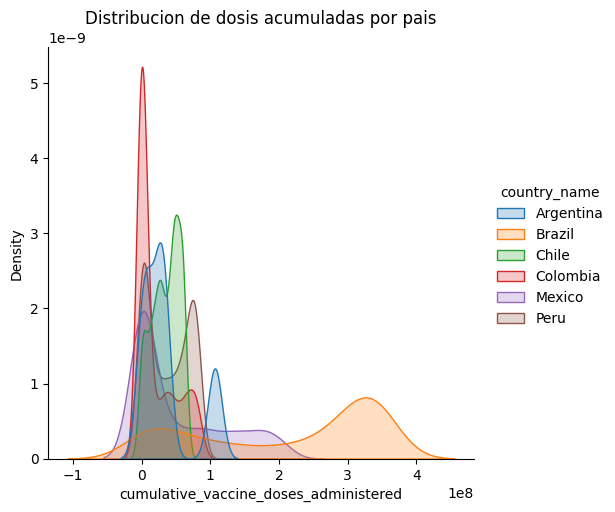

In [32]:
#Dosis acumuladas por país
#Grafico de densidad discriminando por pais y con fill para rellenar
sns.displot(data_limpia, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True )
plt.title("Distribucion de dosis acumuladas por pais")

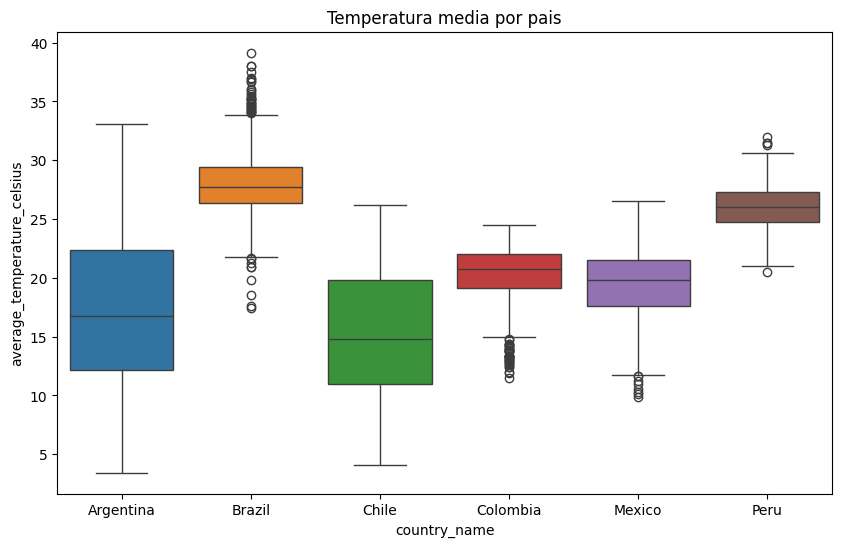

In [33]:
#Boxplot de temperatura media de cada país= average_temperature_celsius vs new_confirmed

fig, ax = plt.subplots(figsize=(10,6))
#grafico de cajas 
sns.boxplot(x="country_name", y="average_temperature_celsius", data=data_limpia, hue="country_name")
plt.title("Temperatura media por pais")
plt.show()

#Argentina y chile son los que tienen mas variacion de temperatura

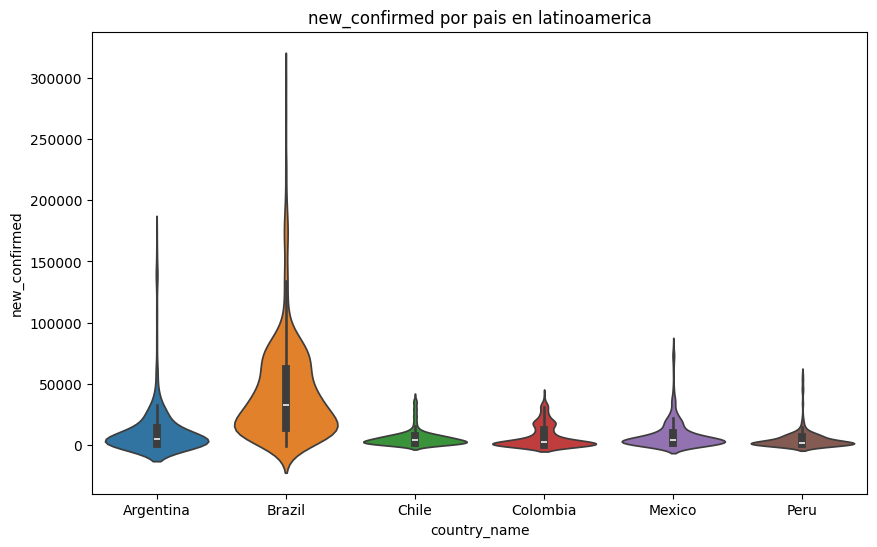

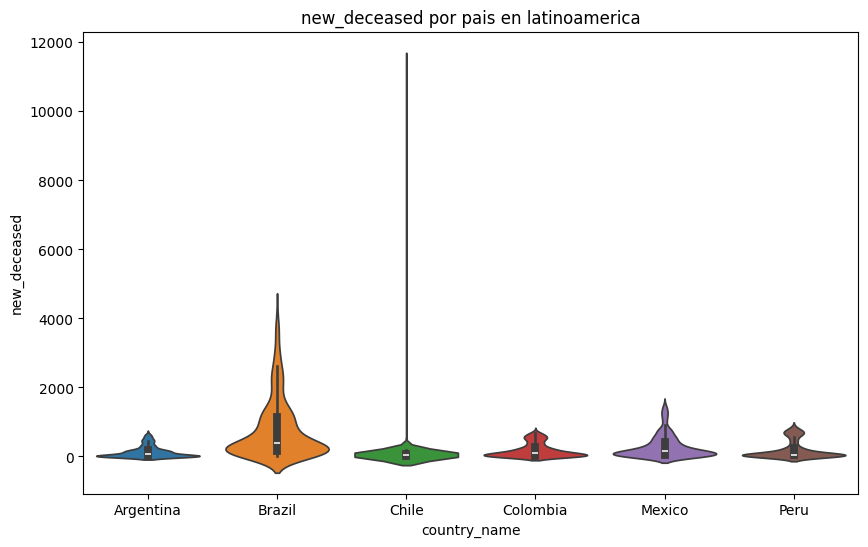

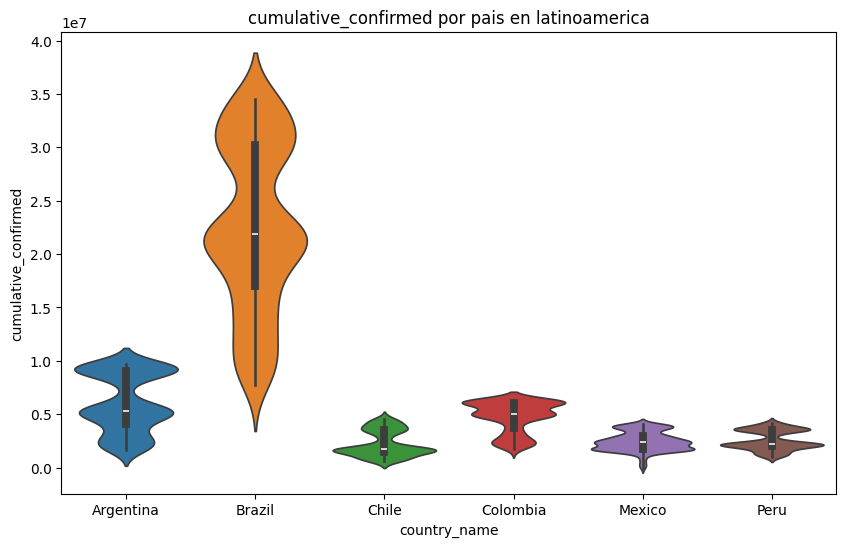

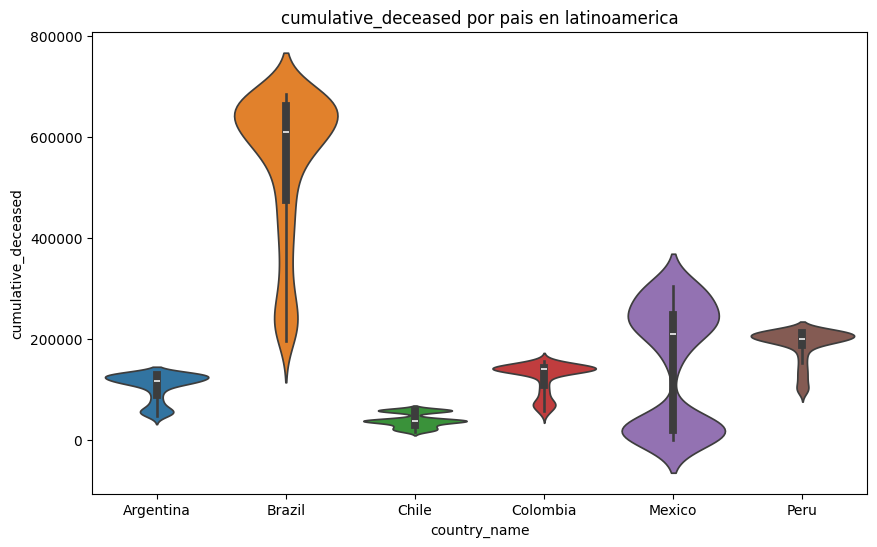

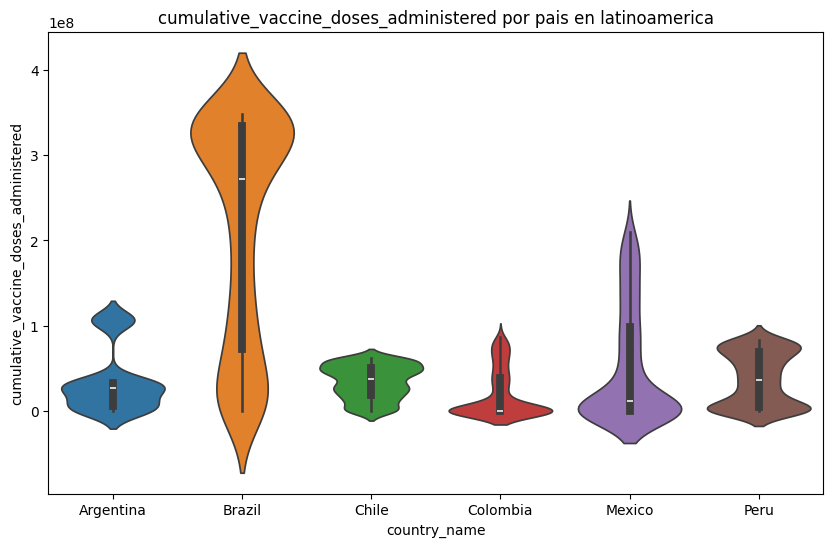

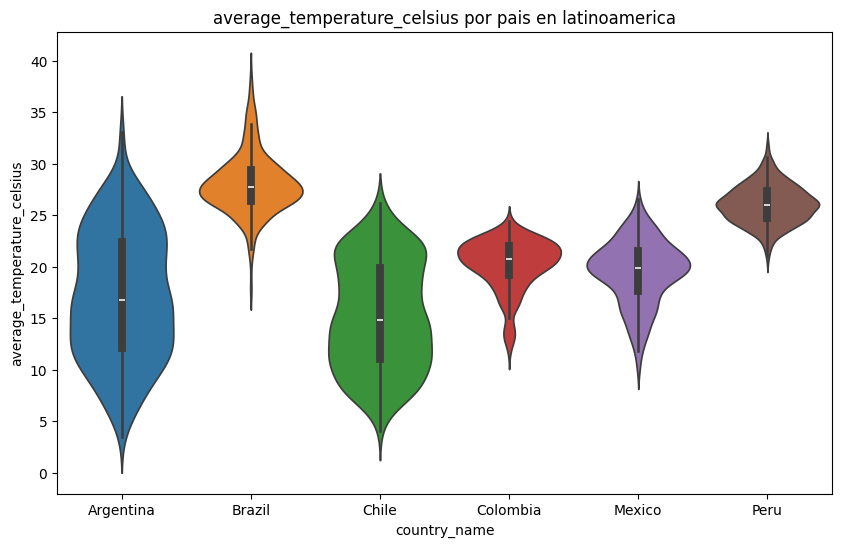

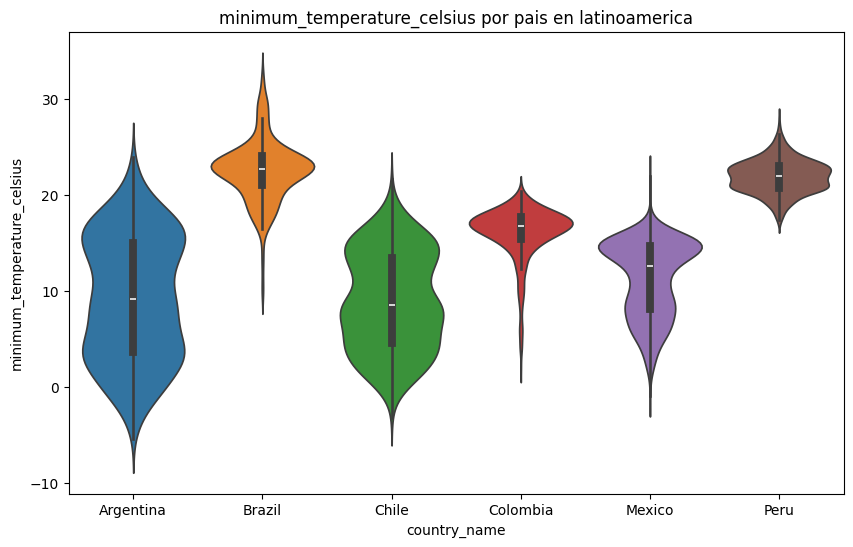

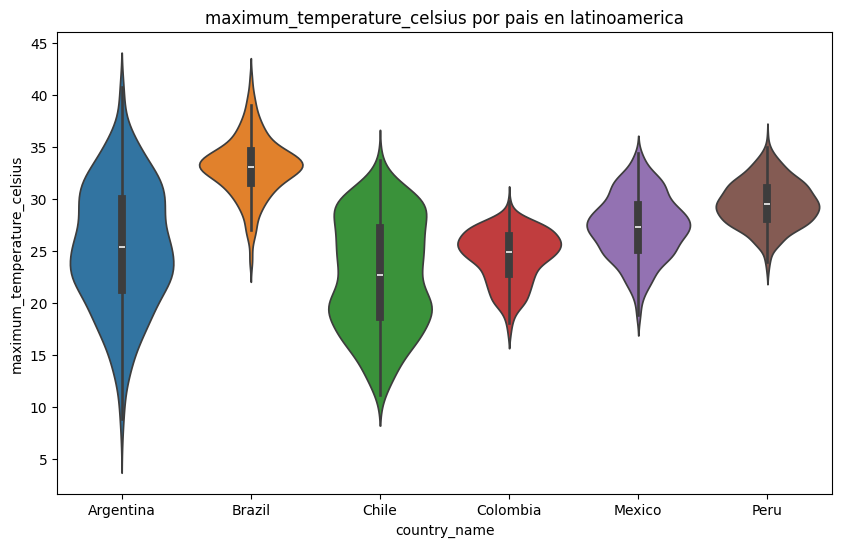

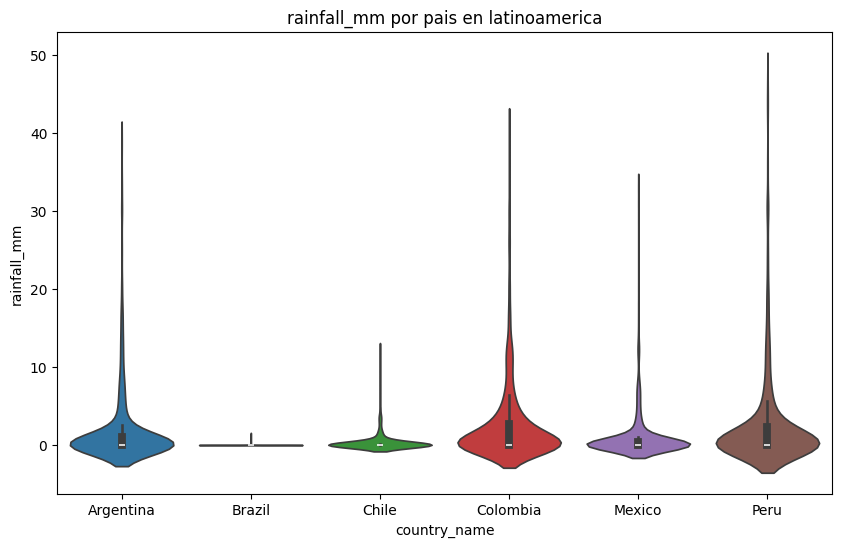

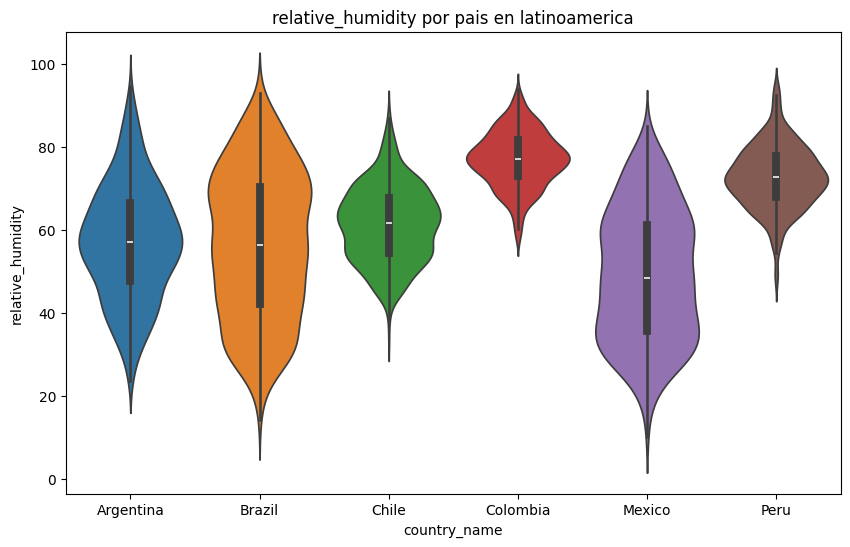

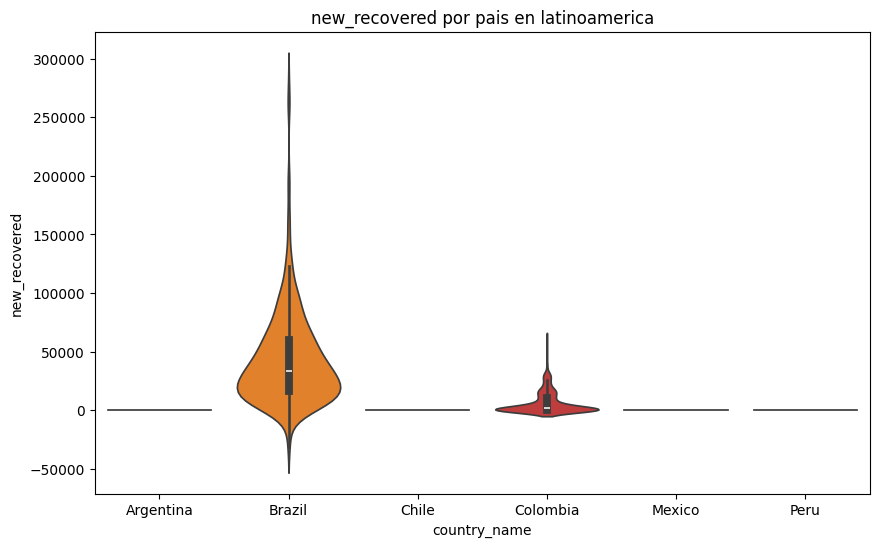

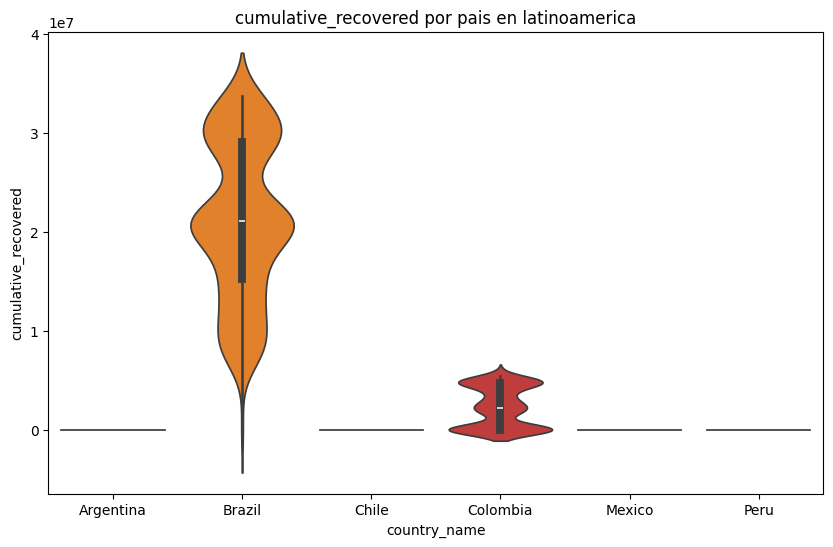

In [34]:
#Se crean un dataframe con columnas mayores a 6 porque son las que tienen valores diferentes por cada pais
columnas_mayores=[]

for i in data_limpia.columns:
    if i not in ["location_key","date","country_code","latitude","longitude"]:
        if data_limpia[i].nunique() > 6 :
            columnas_mayores.append(i)
            
#Agregar a columnas_mayores la columna country_name para porder analizar por pais.abs
columnas_mayores.append("country_name")

#Se crea un dataframe con las columnas mayores a 6
data_mayores = data_limpia[columnas_mayores]

#violinplot en todos los paises para variables numericas 
for i in data_mayores.columns:
    if i not in ["location_key","date","country_code","latitude","longitude","country_name"]:
        fig, ax = plt.subplots(figsize=(10,6))
        #grafico en forma de violin para diferenciar por ejemeplo los valores atipicos
        sns.violinplot(x="country_name", y=i, data=data_mayores, hue="country_name")
        plt.title(f"{i} por pais en latinoamerica")
        plt.show()

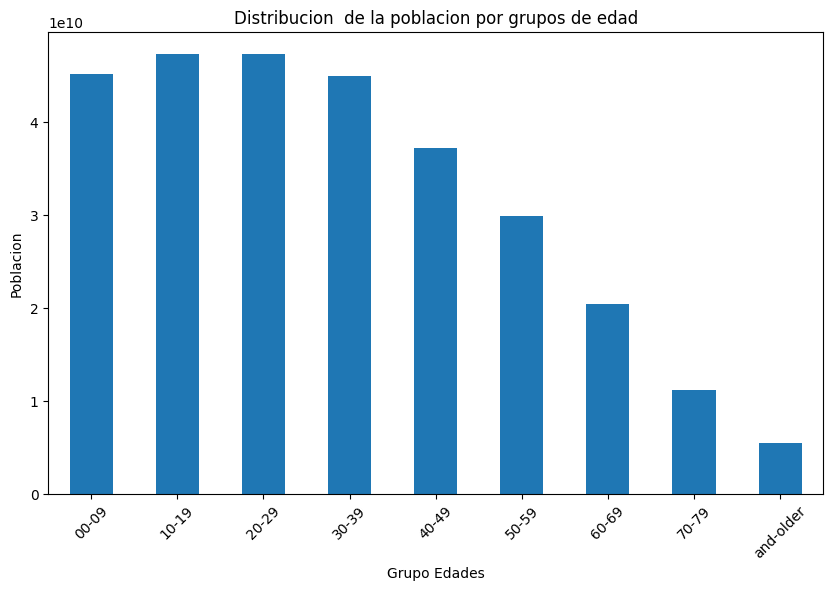

In [35]:
#Se calcula la distribución de la población por grupos de edad.

columnas_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
                'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
                'population_age_60_69', 'population_age_70_79','population_age_80_and_older']
distribucion_edad = data_limpia[columnas_edad].sum()

plt.figure(figsize=(10,6))
distribucion_edad.plot(kind="bar", stacked=True)
plt.xlabel("Grupo Edades")
plt.ylabel("Poblacion")
plt.title("Distribucion  de la poblacion por grupos de edad")
#crea un rango desde 0 hasta el num de columnas, fomatea las etiquetas y le da rotacion
plt.xticks(range(len(columnas_edad)), [col.split("_")[-2] + "-" + col.split("_")[-1] for col in columnas_edad], rotation=45)
plt.show()


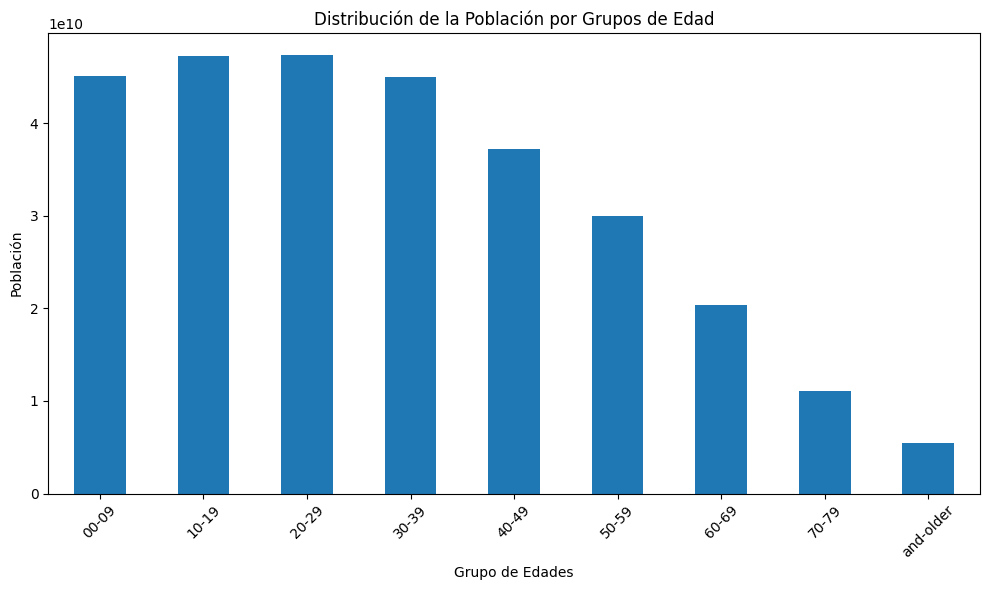

In [36]:

# Se calcula la distribución de la población por grupos de edad.
columnas_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
                  'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
                  'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Sumar la población por grupo de edad
distribucion_edad = data_limpia[columnas_edad].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
distribucion_edad.plot(kind="bar")
plt.xlabel("Grupo de Edades")
plt.ylabel("Población")
plt.title("Distribución de la Población por Grupos de Edad")
plt.xticks(range(len(columnas_edad)), [col.split("_")[-2] + "-" + col.split("_")[-1] for col in columnas_edad], rotation=45)
plt.tight_layout()  # Para que todo se vea bien en el gráfico
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['population_age_00_19']=data_limpia['population_age_00_09']+data_limpia['population_age_10_19']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['population_age_20_39']=data_limpia['population_age_20_29']+data_limpia['population_age_30_39']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:4: Settin

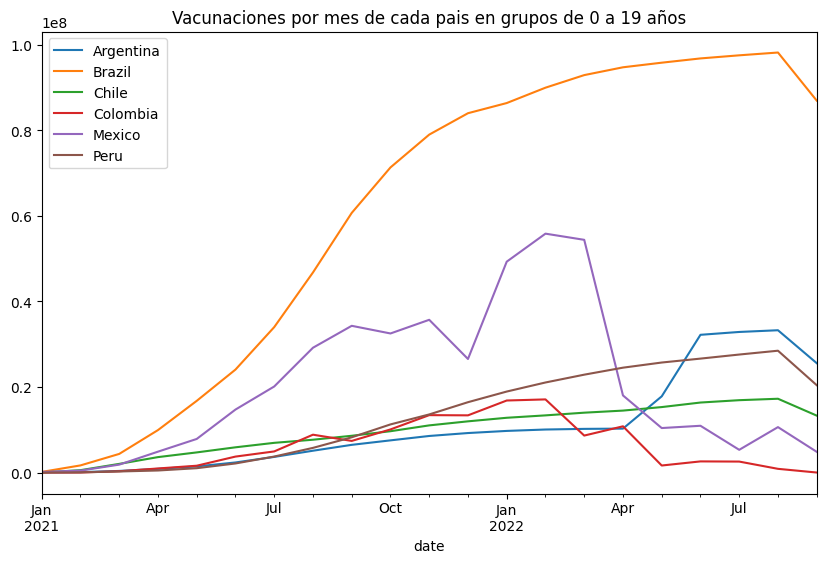

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:45: FutureWarning: 'M' is deprecated and will be remove

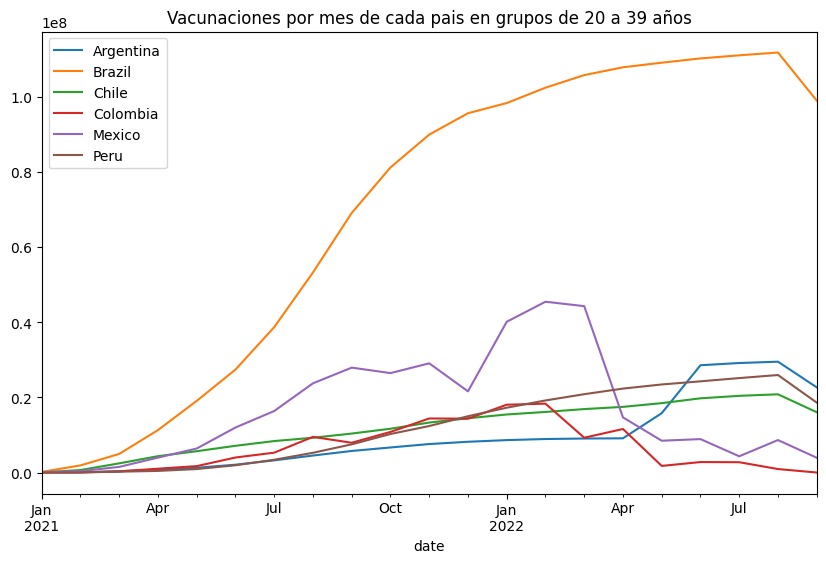

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:54: FutureWarning: 'M' is deprecated and will be remove

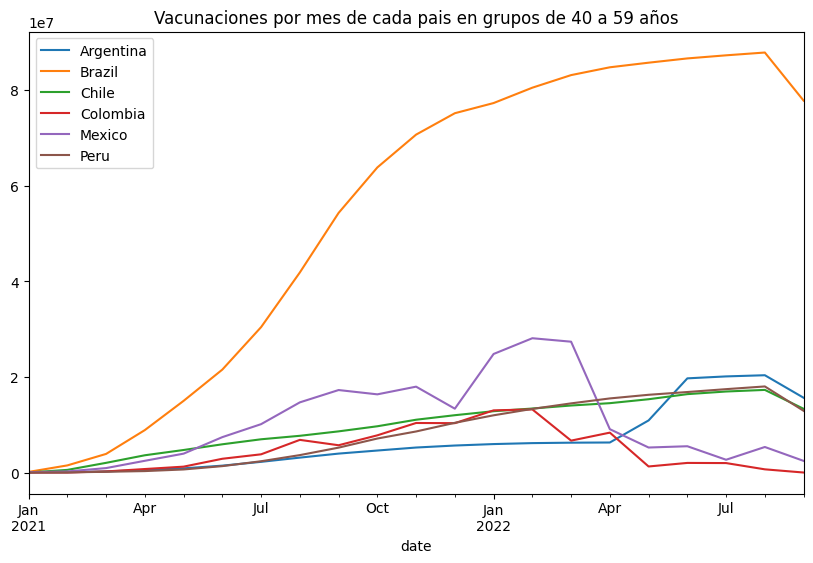

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:63: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:63: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:63: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:63: FutureWarning: 'M' is deprecated and will be remove

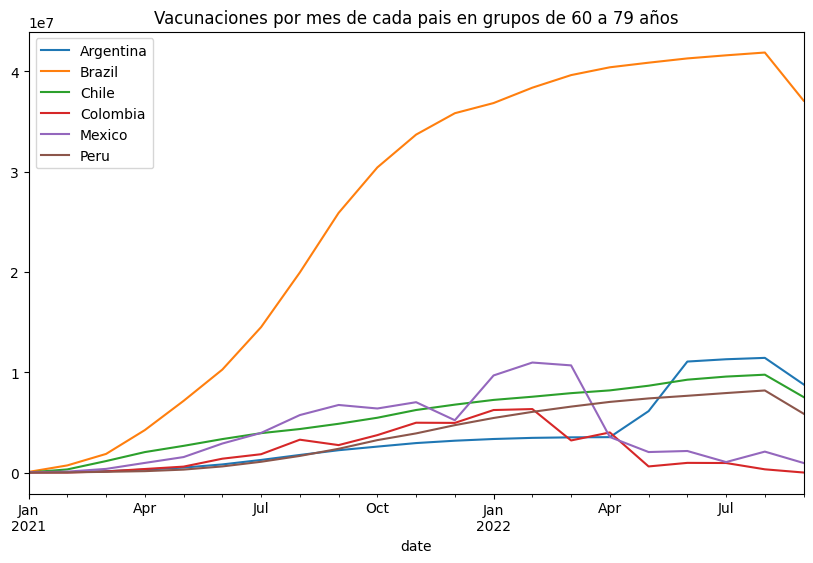

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1864727687.py:72: FutureWarning: 'M' is deprecat

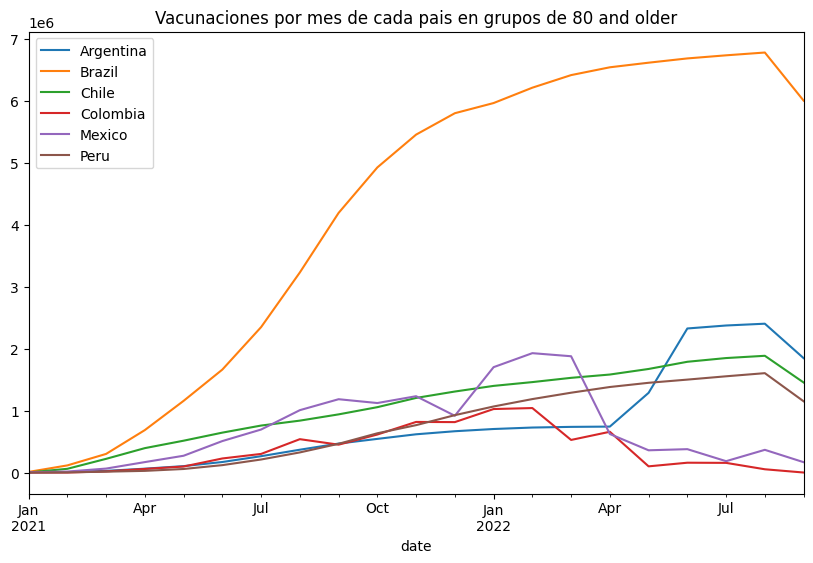

In [37]:
# Grupo etareo mas vacunado
data_limpia['population_age_00_19']=data_limpia['population_age_00_09']+data_limpia['population_age_10_19']
data_limpia['population_age_20_39']=data_limpia['population_age_20_29']+data_limpia['population_age_30_39']
data_limpia['population_age_40_59']=data_limpia['population_age_40_49']+data_limpia['population_age_50_59']
data_limpia['population_age_60_79']=data_limpia['population_age_60_69']+data_limpia['population_age_70_79']
data_limpia['population_age_80_and_older']=data_limpia['population_age_80_and_older']

data_limpia['population_age_00_19_vacunados']=data_limpia['cumulative_vaccine_doses_administered']*data_limpia['population_age_00_19']/data_limpia['population']
data_limpia['population_age_20_39_vacunados']=data_limpia['cumulative_vaccine_doses_administered']*data_limpia['population_age_20_39']/data_limpia['population']
data_limpia['population_age_40_59_vacunados']=data_limpia['cumulative_vaccine_doses_administered']*data_limpia['population_age_40_59']/data_limpia['population']
data_limpia['population_age_60_79_vacunados']=data_limpia['cumulative_vaccine_doses_administered']*data_limpia['population_age_60_79']/data_limpia['population']
data_limpia['population_age_80_and_older_vacunados']=data_limpia['cumulative_vaccine_doses_administered']*data_limpia['population_age_80_and_older']/data_limpia['population']

data_limpia['population_age_00_19_vacunados']=data_limpia['population_age_00_19_vacunados'].fillna(0)
data_limpia['population_age_20_39_vacunados']=data_limpia['population_age_20_39_vacunados'].fillna(0)
data_limpia['population_age_40_59_vacunados']=data_limpia['population_age_40_59_vacunados'].fillna(0)
data_limpia['population_age_60_79_vacunados']=data_limpia['population_age_60_79_vacunados'].fillna(0)
data_limpia['population_age_80_and_older_vacunados']=data_limpia['population_age_80_and_older_vacunados'].fillna(0)

data_limpia['population_age_00_19_vacunados']=data_limpia['population_age_00_19_vacunados'].astype(int)
data_limpia['population_age_20_39_vacunados']=data_limpia['population_age_20_39_vacunados'].astype(int)
data_limpia['population_age_40_59_vacunados']=data_limpia['population_age_40_59_vacunados'].astype(int)
data_limpia['population_age_60_79_vacunados']=data_limpia['population_age_60_79_vacunados'].astype(int)
data_limpia['population_age_80_and_older_vacunados']=data_limpia['population_age_80_and_older_vacunados'].astype(int)

data_limpia['population_age_00_19_vacunados'].sum()
data_limpia['population_age_20_39_vacunados'].sum()
data_limpia['population_age_40_59_vacunados'].sum()
data_limpia['population_age_60_79_vacunados'].sum()
data_limpia['population_age_80_and_older_vacunados'].sum()

#Grafica de valores medios de todos los paises, cumulative_vaccine_doses_administered
#0 a 19
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title("Vacunaciones por mes de cada pais en grupos de 0 a 19 años")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

#20 a 39
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title("Vacunaciones por mes de cada pais en grupos de 20 a 39 años")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

#40 a 59
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title("Vacunaciones por mes de cada pais en grupos de 40 a 59 años")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

#60 a 79
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title("Vacunaciones por mes de cada pais en grupos de 60 a 79 años")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

#80 and older
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()

plt.title("Vacunaciones por mes de cada pais en grupos de 80 and older")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

#def plot_vacunaciones(data, paises, grupo_edad, titulo):
#   fig, ax = plt.subplots(figsize=(10, 6))
#   for pais in paises:
#       data[data['country_name'] == pais].resample('M').mean(numeric_only=True)[grupo_edad].plot()
#    plt.title(titulo)
#    plt.legend(paises, bbox_to_anchor=(1.05, 1), loc="upper left")
#    plt.show()
#for grupo_edad, titulo in grupos_edad.items():
# plot_vacunaciones(data_limpia, paises_seleccionados, grupo_edad, titulo)

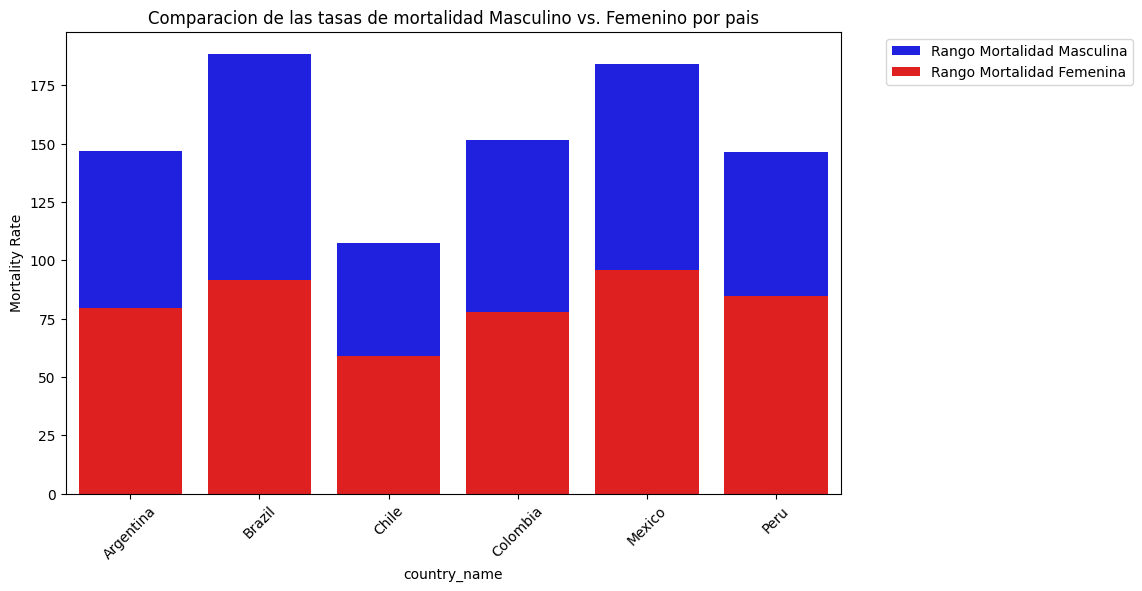

In [38]:
#Grafica de mortalidad Masculino vs Femenino por pais
plt.figure(figsize=(10,6))
#grafico de barras apiladas distinguiendo por color y la leyenda 
sns.barplot(data=data_limpia, x='country_name', y='adult_male_mortality_rate',color='blue',label='Rango Mortalidad Masculina')
sns.barplot(data=data_limpia, x='country_name', y='adult_female_mortality_rate',color='red',label='Rango Mortalidad Femenina')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparacion de las tasas de mortalidad Masculino vs. Femenino por pais')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

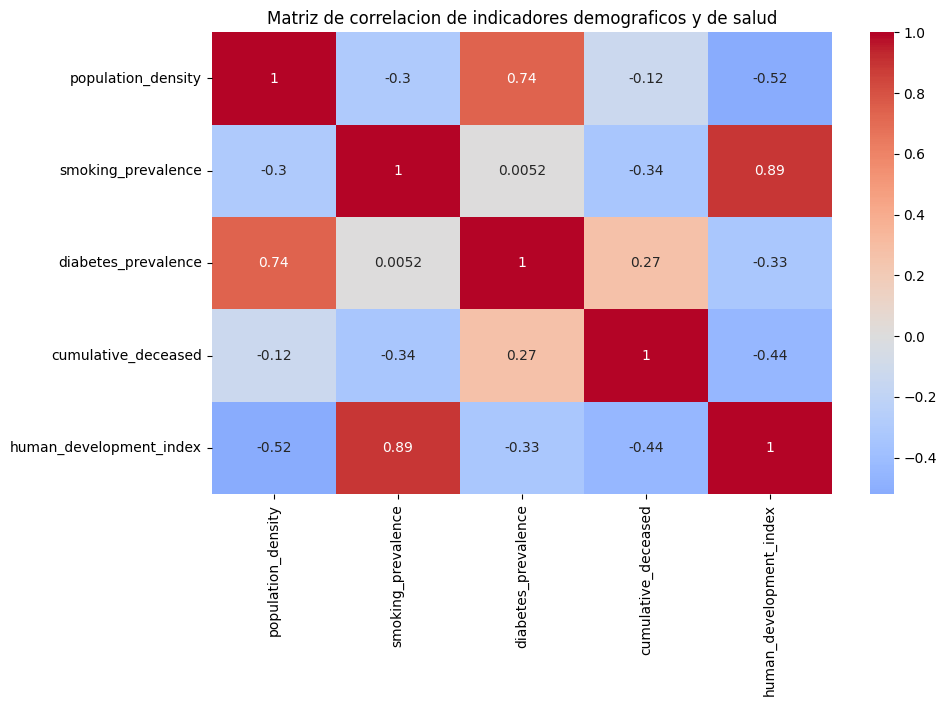

In [39]:
#Matriz de correlación de indicadores demográficos y de salud.

columnas_correlacion = ['population_density','smoking_prevalence','diabetes_prevalence','cumulative_deceased','human_development_index']
correlacion_matrix = data_limpia[columnas_correlacion].corr()
plt.figure(figsize=(10,6))
#mapa de escalones mostrando las correlaciones de las columnas con frio y calor
sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlacion de indicadores demograficos y de salud")
plt.show()

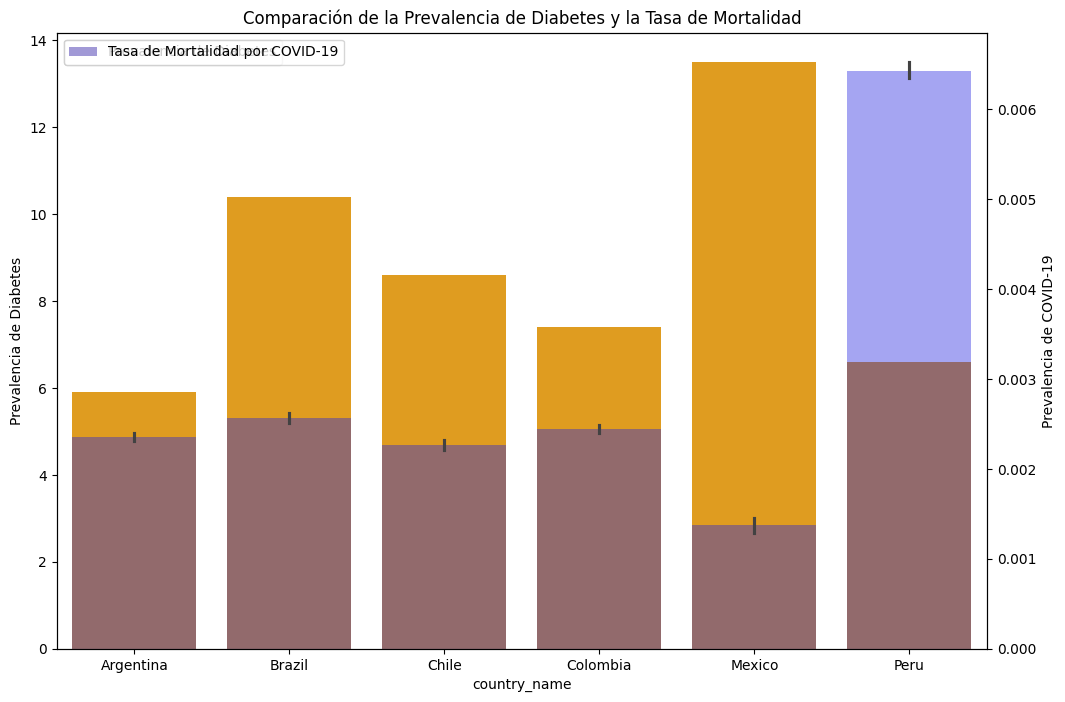

In [41]:
#Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad. con grafico de doble eje

fig, ax = plt.subplots(1,1,figsize=(12,8))
#Clasico grafico de barras pero esta vez con doble eje
sns.barplot(data=data_limpia, x= data_limpia['country_name'], y= data_limpia['diabetes_prevalence'], color='orange', label='Prevalencia de Diabetes')
#crea un segundo eje con twinx
ax2 = ax.twinx()
sns.barplot(data=data_limpia, x= data_limpia['country_name'], y= data_limpia['cumulative_deceased'] / data_limpia['population'], color='blue', label='Tasa de Mortalidad por COVID-19', ax=ax2, alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Prevalencia de COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad')
plt.show()

# ------------AVANCE 3 PROYECTO INTEGRADOR ------------

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\1553834675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['month'] = data_limpia.index.month


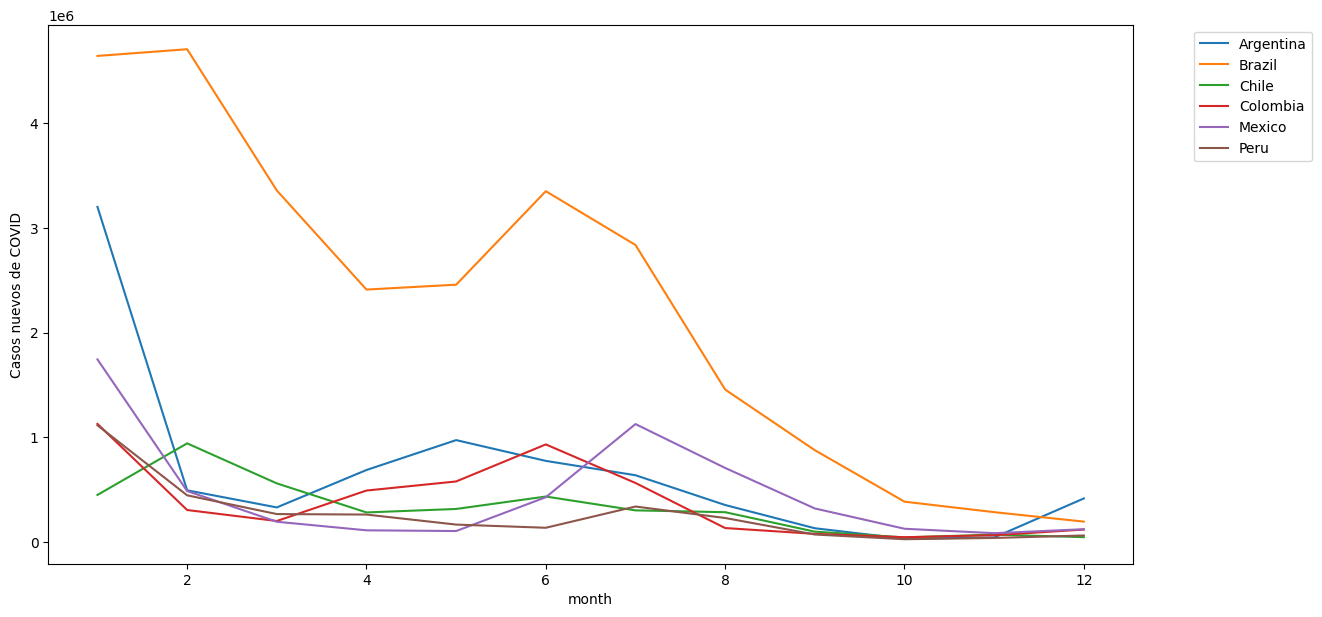

In [42]:
#Evolución de Casos COVID-19 a lo largo del tiempo por mes
#se agrega la columna de mes
data_limpia['month'] = data_limpia.index.month
#se agrupa por pais y mes
casos_1 = data_limpia.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()
#tamaño y creacion  de grafico iterando por valor unico
plt.figure(figsize=(14,7))
for pais in casos_1['country_name'].unique():
    pais_casos_1 = casos_1[casos_1['country_name'] == pais]
    plt.plot(pais_casos_1['month'], pais_casos_1['new_confirmed'], label=pais)
    
plt.xlabel('month')
plt.ylabel('Casos nuevos de COVID')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#Este grafico desmuestra como fue disminuyendo los casos en la pandemia en cada pais teniendo Argentina en relevancia por el aumento de casos en el ultimo mes del año

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\3837811416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['percentage_vaccinated'] = data_limpia['cumulative_vaccine_doses_administered'] / data_limpia['population'] * 100
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\3837811416.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\3837811416.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_limpia.resample('M').mean(numeric_only=True)['percentage_vacci

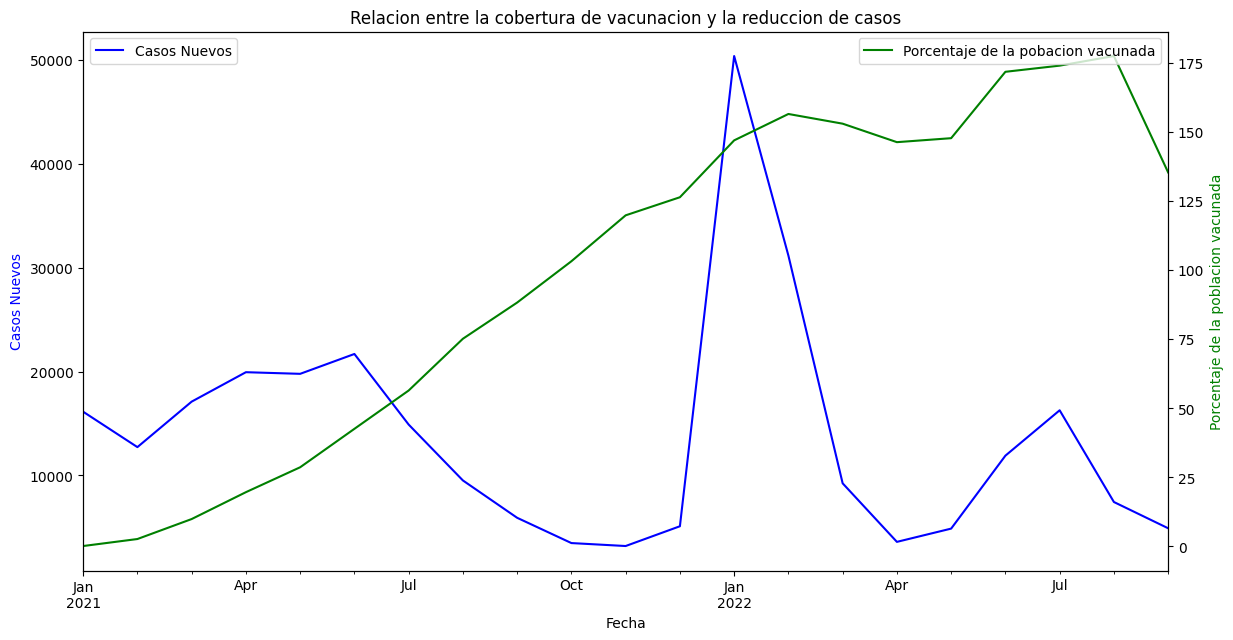

In [44]:
# Relación entre la Cobertura de Vacunación y la Reducción de Casos

plt.figure(figsize=(14,7))
ax1 = plt.gca() # Obtener el eje actual
ax2 = ax1.twinx()  # Crear un segundo eje y para superponerlo

#Porcentajes de Vacunacion
data_limpia['percentage_vaccinated'] = data_limpia['cumulative_vaccine_doses_administered'] / data_limpia['population'] * 100
#Nuevos casos y el porcentaje 
data_limpia.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_limpia.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la pobacion vacunada')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la poblacion vacunada', color='green')
ax1.set_title('Relacion entre la cobertura de vacunacion y la reduccion de casos')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()





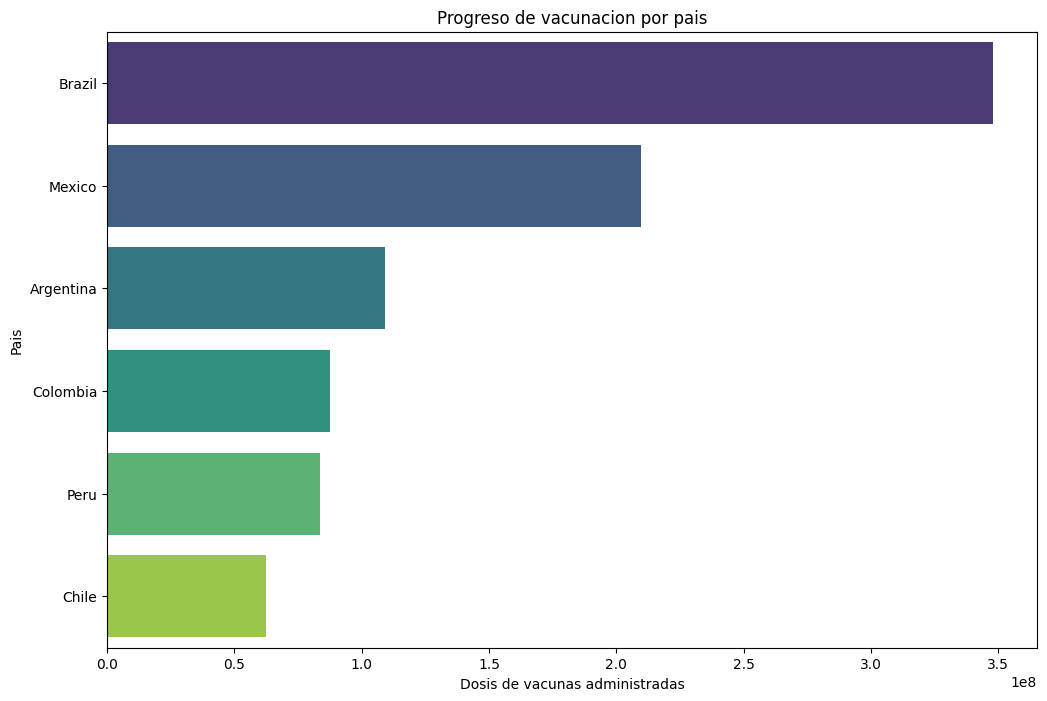

In [45]:
#Progreso de la vacunación por país utilizando un grafico de barras y viridis para gama de colores

vacunaciones_pais = data_limpia.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=vacunaciones_pais.values, y=vacunaciones_pais.index, hue=vacunaciones_pais.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Progreso de vacunacion por pais')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2169922152.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax1.plot(data_limpia.resample('M').mean(numeric_only=True).index, data_limpia.resample('M').mean(numeric_only=True)['new_confirmed'], color='red', label='Nuevos Casos Confirmados')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2169922152.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax2.plot(data_limpia.resample('M').mean(numeric_only=True).index, data_limpia.resample('M').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Temperatura Promedio', linestyle= '--')


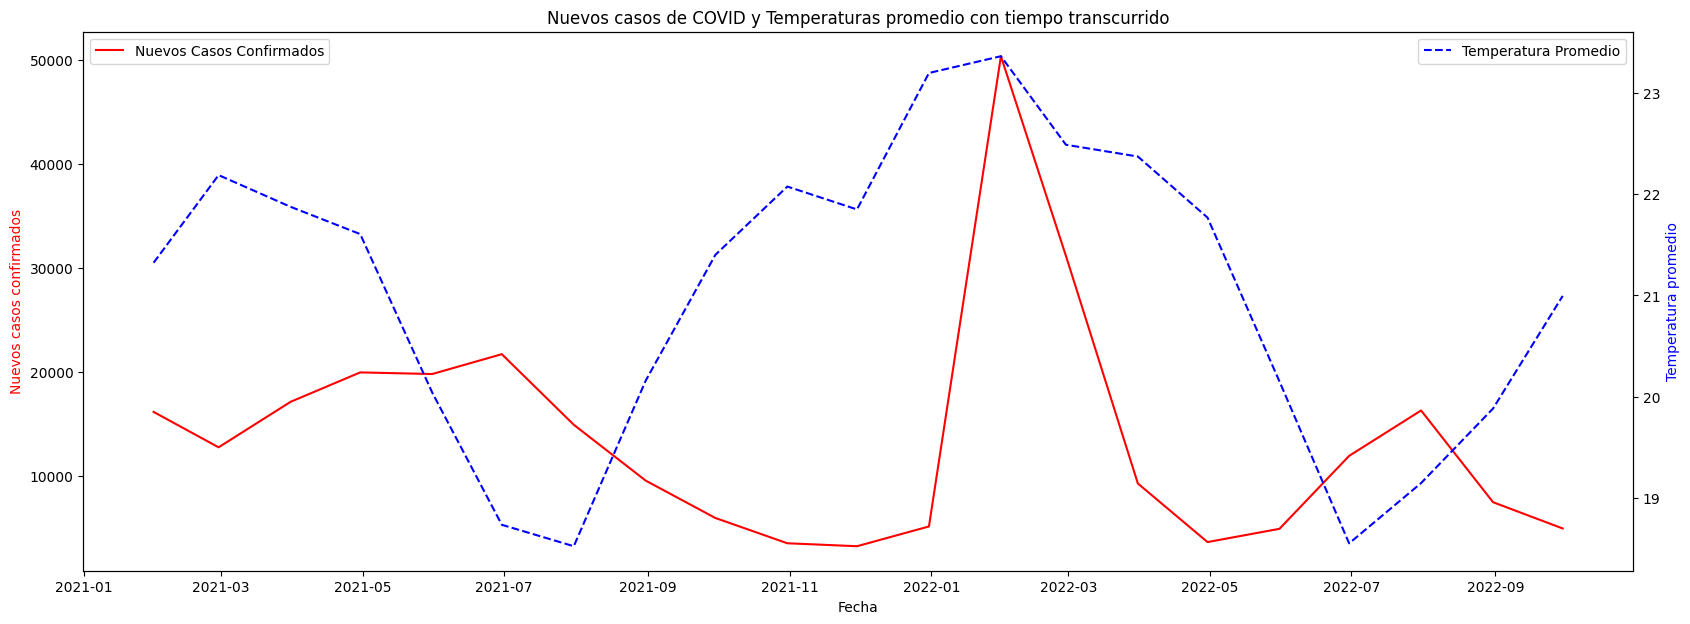

In [46]:
# Grafico de doble eje con relacion entre las temperaturas promedio y los nuevos casos confirmados de COVID-19 c

plt.figure(figsize=(20,7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(data_limpia.resample('M').mean(numeric_only=True).index, data_limpia.resample('M').mean(numeric_only=True)['new_confirmed'], color='red', label='Nuevos Casos Confirmados')
ax2.plot(data_limpia.resample('M').mean(numeric_only=True).index, data_limpia.resample('M').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Temperatura Promedio', linestyle= '--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio', color='blue')
plt.title('Nuevos casos de COVID y Temperaturas promedio con tiempo transcurrido')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\728360527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['urban_population_percentage'] = data_limpia['population_urban'] / data_limpia['population']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\728360527.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, palette='viridis')


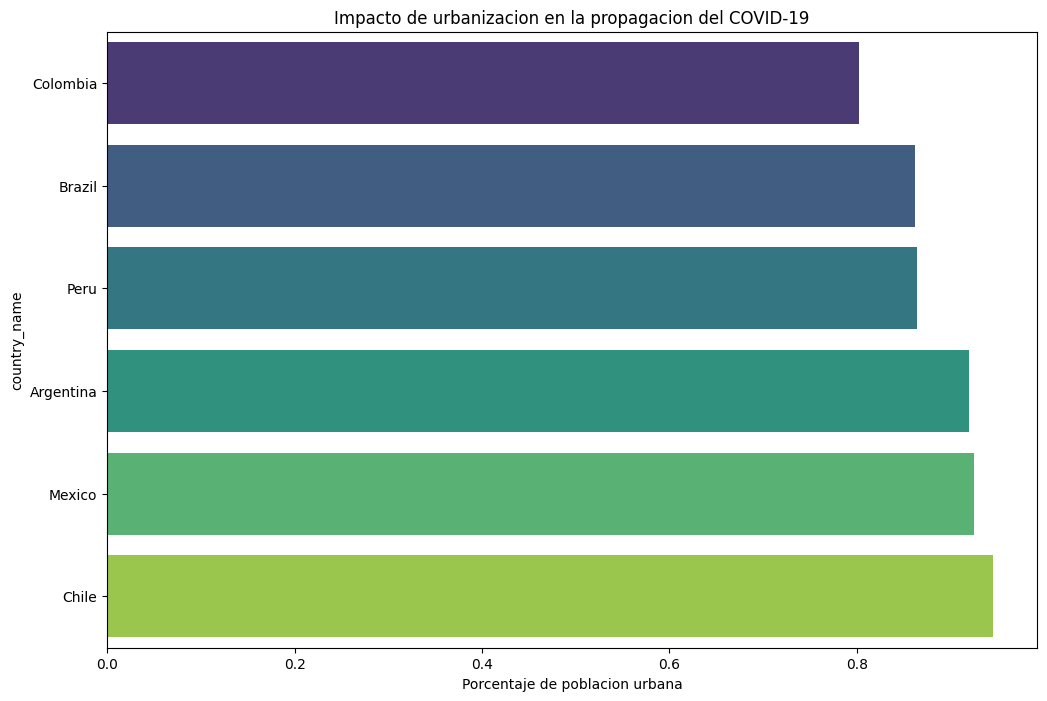

In [48]:
# Impacto de la Urbanización en la Propagación del Covid-19 en Latinoamerica discriminando por pais

data_limpia['urban_population_percentage'] = data_limpia['population_urban'] / data_limpia['population']
#agrupamos y ordenamos 
casos_urbanos = data_limpia.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12,8))
sns.barplot(x= casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, palette='viridis')
plt.xlabel('Porcentaje de poblacion urbana')
plt.title('Impacto de urbanizacion en la propagacion del COVID-19')
plt.show()


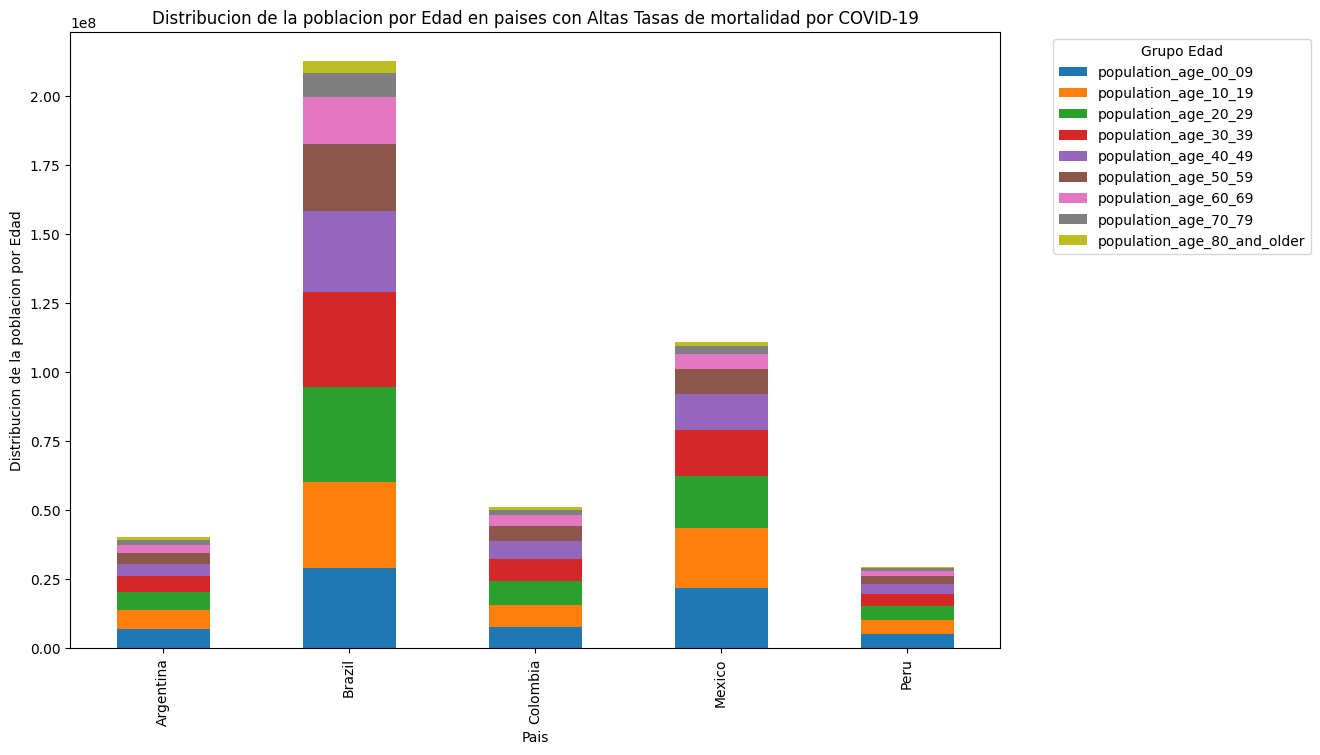

In [49]:
# Evolución Semanal de Casos Nuevos por paises
#Ordenamos valores e indicamos la maxima cantidad y apilando valores
mortalidad_pais = data_limpia.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
grupo_edad = ['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
edad_distribucion = data_limpia[data_limpia['country_name'].isin(mortalidad_pais)].groupby('country_name')[grupo_edad].mean()

edad_distribucion.plot(kind='bar', stacked=True, figsize=(12,8))
plt.xlabel('Pais')
plt.ylabel('Distribucion de la poblacion por Edad')
plt.title('Distribucion de la poblacion por Edad en paises con Altas Tasas de mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', title='Grupo Edad')
plt.show()


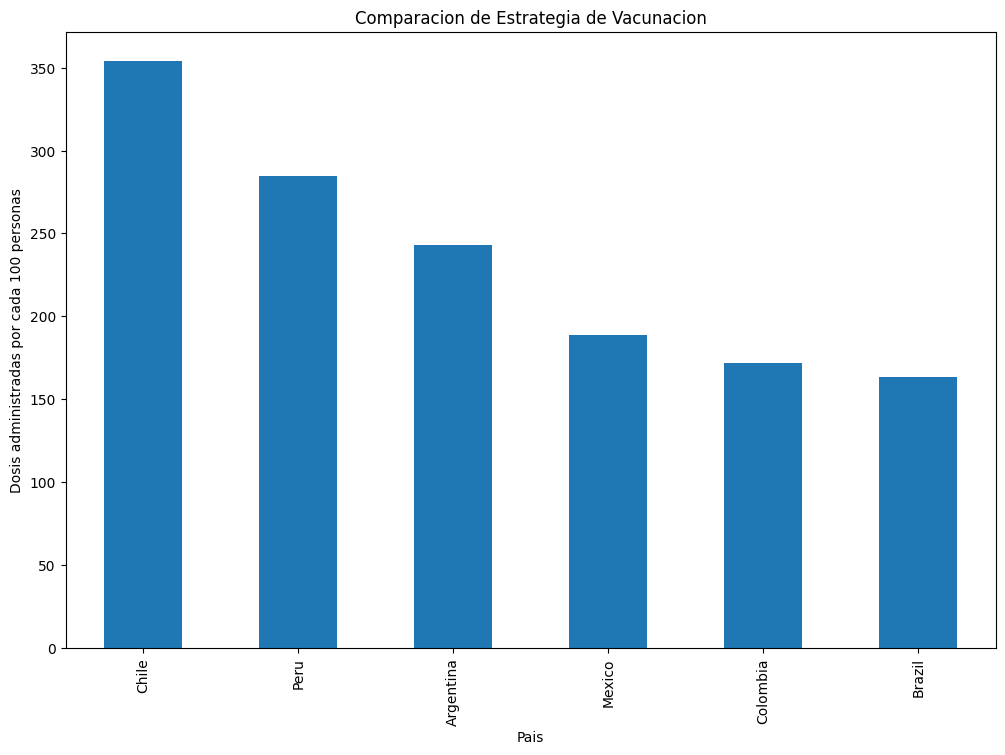

In [50]:
# Comparación de Estrategias de Vacunación en América Latina con los paises filtrados

estrategia_vac = data_limpia.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_limpia.groupby('country_name')['population'].mean() *100
estrategia_vac.sort_values(ascending=False).plot(kind='bar', figsize=(12,8))
plt.xlabel('Pais')
plt.ylabel('Dosis administradas por cada 100 personas')
plt.title('Comparacion de Estrategia de Vacunacion')
plt.show()




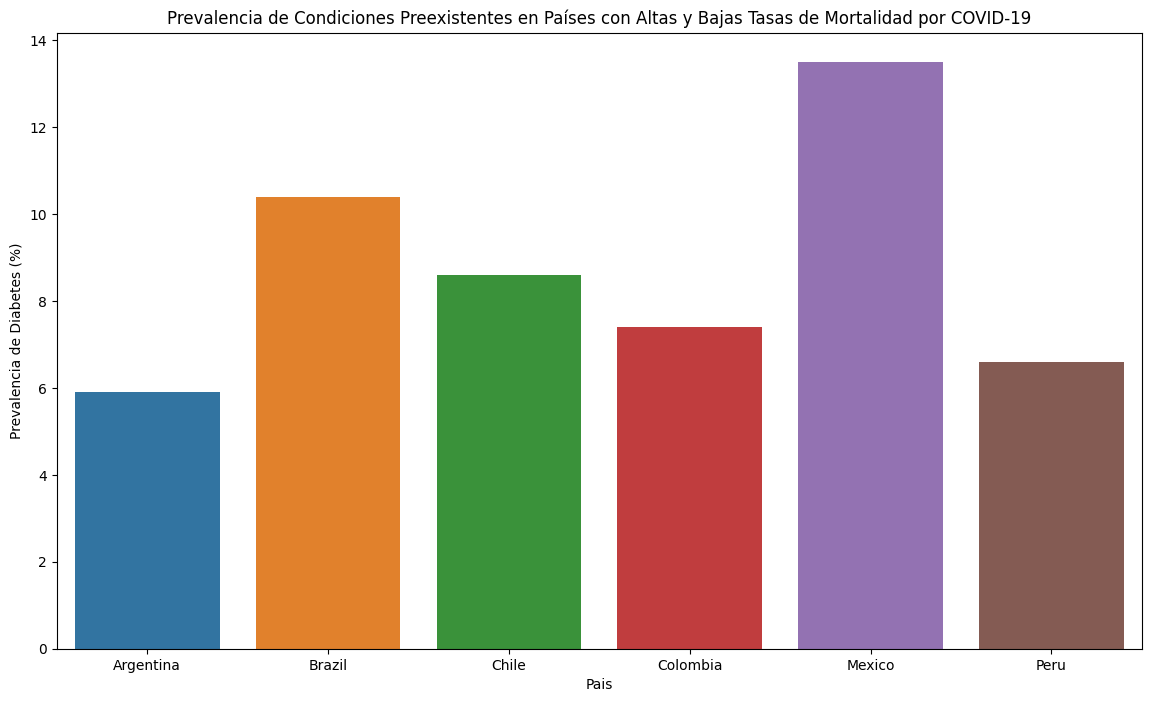

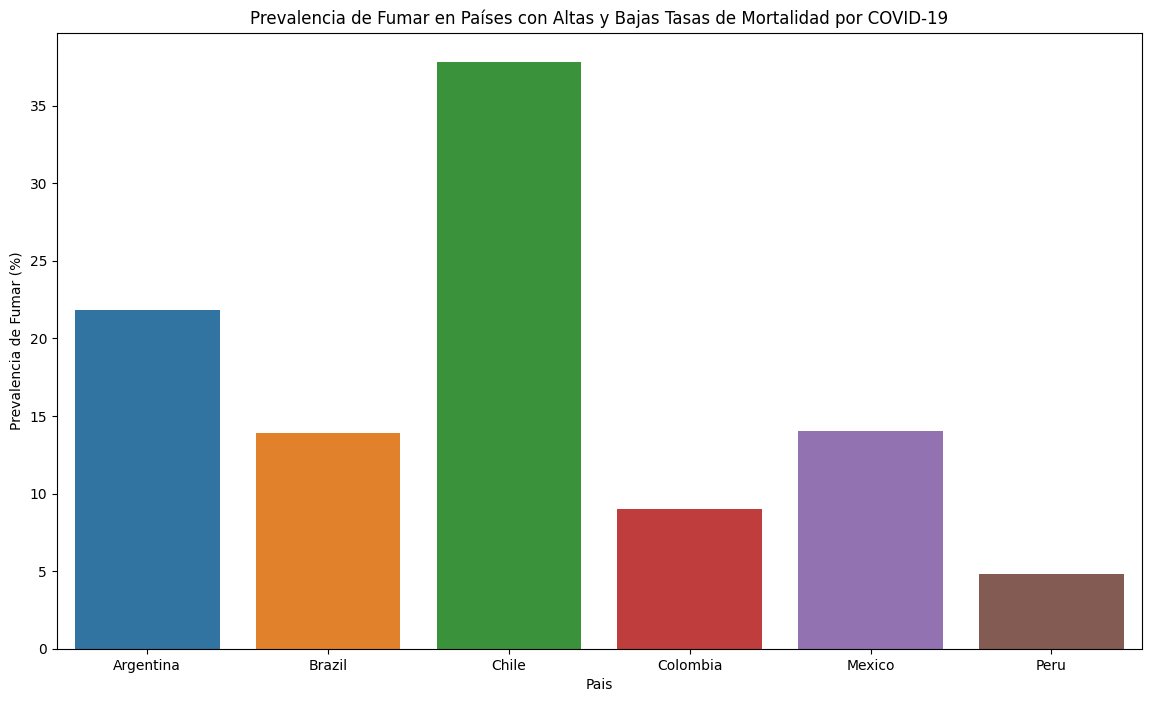

In [51]:
#Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad 'smoking_prevalence' y 'diabetes_prevalence'
#numero maximo de muertes acumuladas
pre_paises = data_limpia.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
#De manera similar, esta línea selecciona los 5 países con el menor número de muertes acumuladas.
inf_paises = data_limpia.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
#Se filtra el DataFrame original para incluir solo las filas que pertenecen a los países
condiciones = data_limpia[data_limpia['country_name'].isin(pre_paises.union(inf_paises))]
#prevalencia de Diabetes
plt.figure(figsize=(14,8))
sns.barplot(data=condiciones, x= 'country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

#Grafico para prevalencia de fumar
plt.figure(figsize=(14,8))
sns.barplot(data=condiciones, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2991806906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['case_fatality_rate'] = data_limpia['cumulative_deceased'] / data_limpia['cumulative_confirmed']


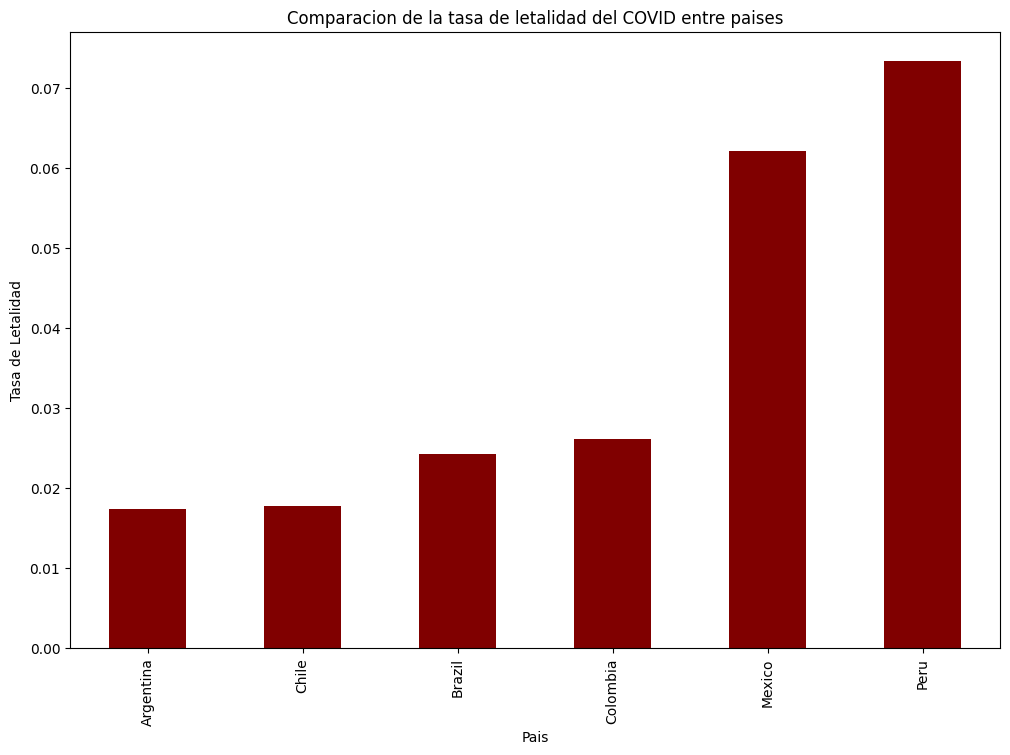

In [52]:
# Fatalidad por pais

data_limpia['case_fatality_rate'] = data_limpia['cumulative_deceased'] / data_limpia['cumulative_confirmed']
#last nuevamente el ultimo valor y ordenar de menor a mayor
rango_fatal = data_limpia.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12,8))
rango_fatal.plot(kind='bar', color='maroon')
plt.xlabel('Pais')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparacion de la tasa de letalidad del COVID entre paises')
plt.show()

# al hacer un promedio por pais dan el mismo valor por lo que no difiere en el grafico

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2282002167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['mortality_rate'] = data_limpia['cumulative_deceased'] / data_limpia['cumulative_confirmed']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\2282002167.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_limpia, x='date', y='mortality_rate', estimator='mean', ci=None)


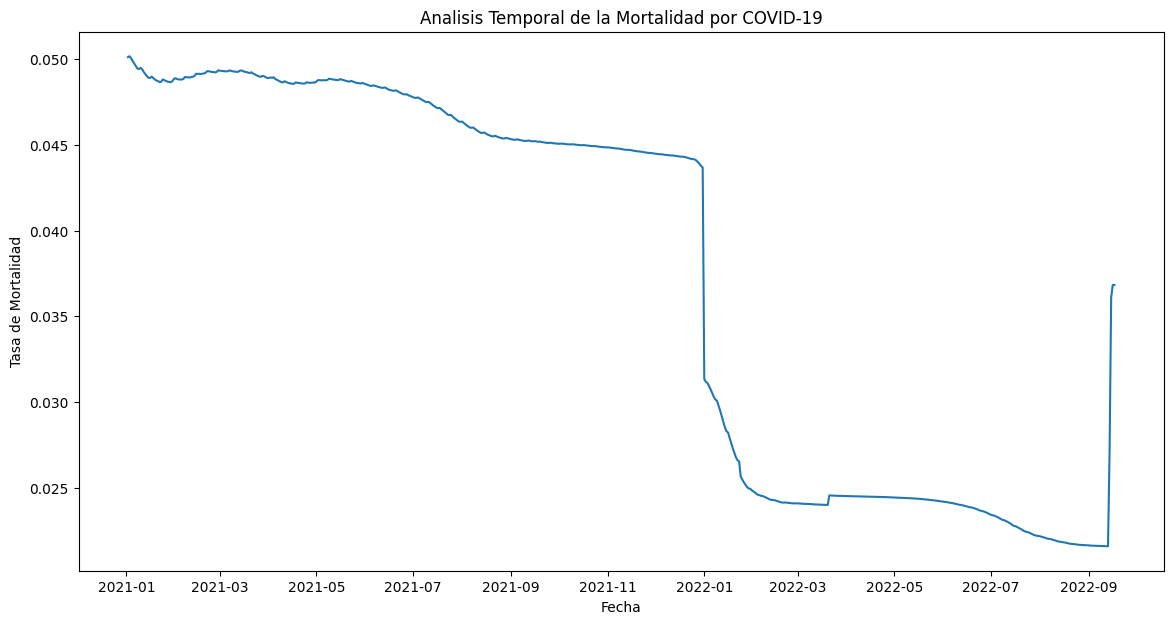

In [53]:
#Análisis Temporal de la Mortalidad/

data_limpia['mortality_rate'] = data_limpia['cumulative_deceased'] / data_limpia['cumulative_confirmed']

plt.figure(figsize=(14,7))
#Grafico de lineas  y agrupando por la media
sns.lineplot(data=data_limpia, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.title('Analisis Temporal de la Mortalidad por COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\4149791689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['casos_activos'] = data_limpia['cumulative_confirmed'] - data_limpia['cumulative_deceased'] - data_limpia['cumulative_recovered']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\4149791689.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_limpia.resample('M').mean(numeric_only=True), x='date', y='casos_activos', label='Casos Activos')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9504\4149791689.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_limpia.resample('M').mea

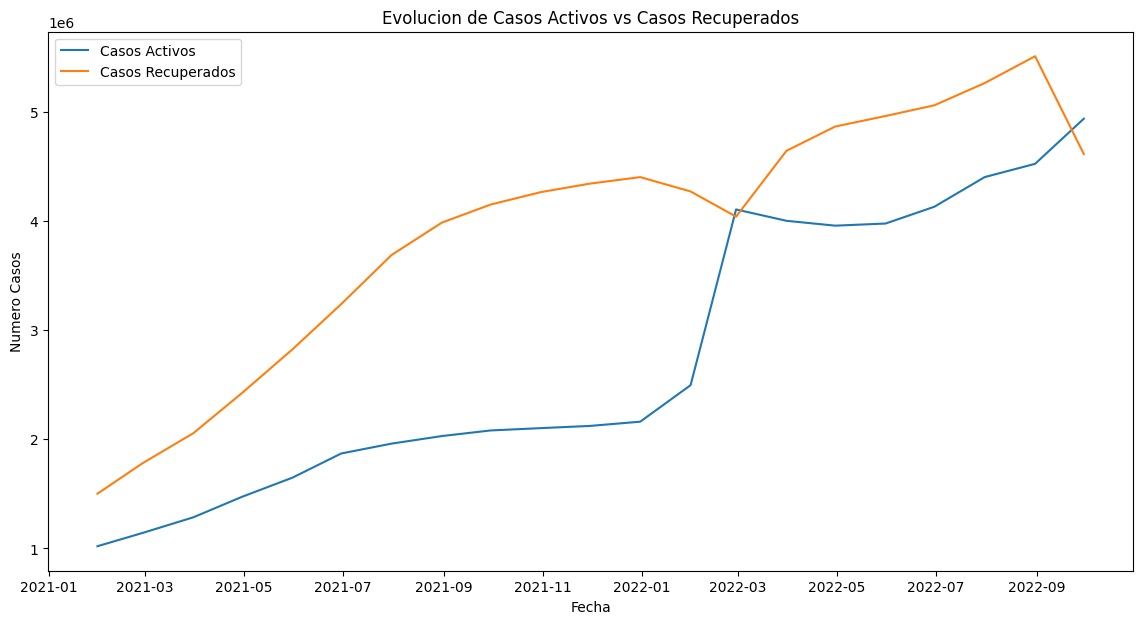

In [54]:
#Evolución de Casos Activos vs. Recuperados para latam

data_limpia['casos_activos'] = data_limpia['cumulative_confirmed'] - data_limpia['cumulative_deceased'] - data_limpia['cumulative_recovered']
plt.figure(figsize=(14,7))
#Nuevamente graficod e lineas
sns.lineplot(data=data_limpia.resample('M').mean(numeric_only=True), x='date', y='casos_activos', label='Casos Activos')
sns.lineplot(data=data_limpia.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Numero Casos')
plt.title('Evolucion de Casos Activos vs Casos Recuperados')
plt.legend()
plt.show()

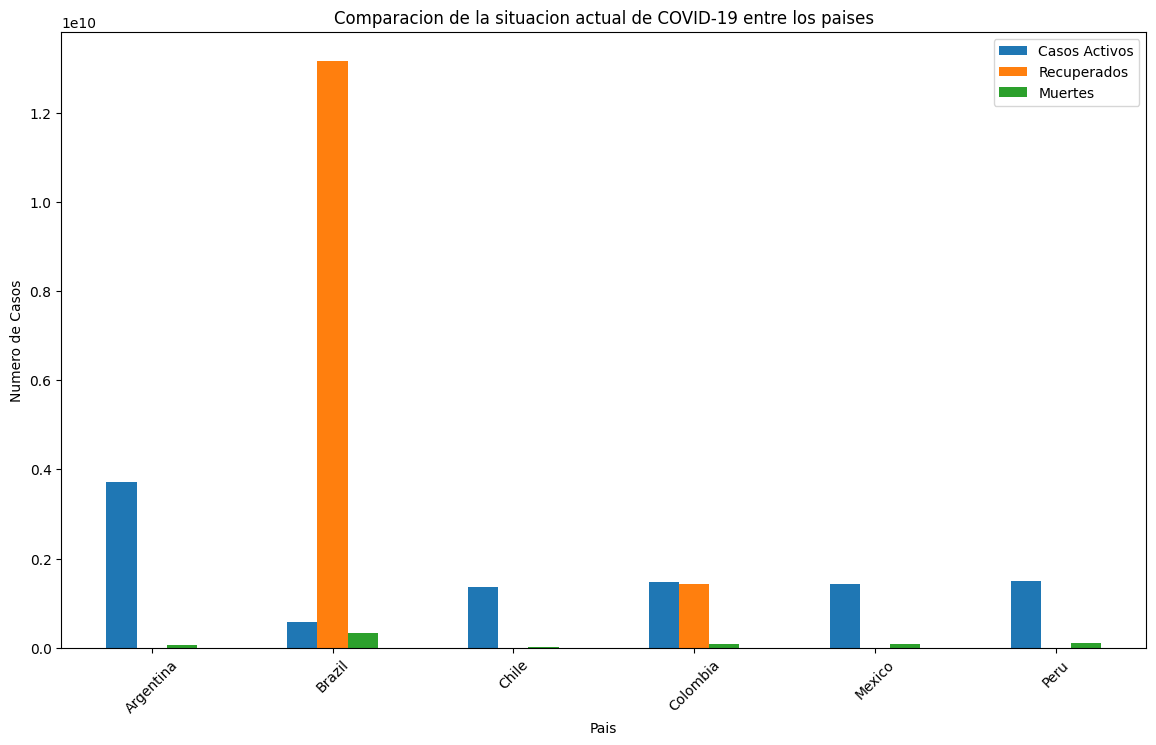

In [55]:
# COMPARACION DE PAISES ACTUAL PERO SOLO HAY DATOS DE ALGUNOS PAISES

actualidad = data_limpia.groupby('country_name').sum()[['casos_activos','cumulative_recovered','cumulative_deceased']]
actualidad.plot(kind='bar', stacked=False, figsize=(14,8))
plt.title('Comparacion de la situacion actual de COVID-19 entre los paises')
plt.xlabel('Pais')
plt.ylabel('Numero de Casos')
plt.legend(['Casos Activos', 'Recuperados','Muertes'])
plt.xticks(rotation=45)
plt.show()